In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings as wn
wn.filterwarnings("ignore")

In [2]:
df=pd.read_csv("wine.csv")
df

wine  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0       1    14.23        1.71  2.43               15.6        127   
1       1    13.20        1.78  2.14               11.2        100   
2       1    13.16        2.36  2.67               18.6        101   
3       1    14.37        1.95  2.50               16.8        113   
4       1    13.24        2.59  2.87               21.0        118   
..    ...      ...         ...   ...                ...        ...   
173     3    13.71        5.65  2.45               20.5         95   
174     3    13.40        3.91  2.48               23.0        102   
175     3    13.27        4.28  2.26               20.0        120   
176     3    13.17        2.59  2.37               20.0        120   
177     3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               5.64  1.04                          3.92     1065  
1               4.38  1.05                          3.40     1050  
2               5.68  1.03                          3.17     1185  
3               7.80  0.86                          3.45     1480  
4               4.32  1.04                          2.93      735  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74      740  
174             7.30  0.70                          1.56      750  
175            10.20  0.59                          1.56      835  
176             9.30  0.60                          1.62      840  
177             9.20  0.61                          1.60      560  

[178 rows x 14 columns]

# Business case 

* Given dataset has various features that helps to classify the best wine in the market
* Why it is done ?

# Domain Analysis

In [3]:
df

wine  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0       1    14.23        1.71  2.43               15.6        127   
1       1    13.20        1.78  2.14               11.2        100   
2       1    13.16        2.36  2.67               18.6        101   
3       1    14.37        1.95  2.50               16.8        113   
4       1    13.24        2.59  2.87               21.0        118   
..    ...      ...         ...   ...                ...        ...   
173     3    13.71        5.65  2.45               20.5         95   
174     3    13.40        3.91  2.48               23.0        102   
175     3    13.27        4.28  2.26               20.0        120   
176     3    13.17        2.59  2.37               20.0        120   
177     3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               5.64  1.04                          3.92     1065  
1               4.38  1.05                          3.40     1050  
2               5.68  1.03                          3.17     1185  
3               7.80  0.86                          3.45     1480  
4               4.32  1.04                          2.93      735  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74      740  
174             7.30  0.70                          1.56      750  
175            10.20  0.59                          1.56      835  
176             9.30  0.60                          1.62      840  
177             9.20  0.61                          1.60      560  

[178 rows x 14 columns]

In [4]:
df.head(10)

wine  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0     1    14.23        1.71  2.43               15.6        127   
1     1    13.20        1.78  2.14               11.2        100   
2     1    13.16        2.36  2.67               18.6        101   
3     1    14.37        1.95  2.50               16.8        113   
4     1    13.24        2.59  2.87               21.0        118   
5     1    14.20        1.76  2.45               15.2        112   
6     1    14.39        1.87  2.45               14.6         96   
7     1    14.06        2.15  2.61               17.6        121   
8     1    14.83        1.64  2.17               14.0         97   
9     1    13.86        1.35  2.27               16.0         98   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   
5           3.27        3.39                  0.34             1.97   
6           2.50        2.52                  0.30             1.98   
7           2.60        2.51                  0.31             1.25   
8           2.80        2.98                  0.29             1.98   
9           2.98        3.15                  0.22             1.85   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735  
5             6.75  1.05                          2.85     1450  
6             5.25  1.02                          3.58     1290  
7             5.05  1.06                          3.58     1295  
8             5.20  1.08                          2.85     1045  
9             7.22  1.01                          3.55     1045

In [5]:
df.tail(10)

wine  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
168     3    13.58        2.58  2.69               24.5        105   
169     3    13.40        4.60  2.86               25.0        112   
170     3    12.20        3.03  2.32               19.0         96   
171     3    12.77        2.39  2.28               19.5         86   
172     3    14.16        2.51  2.48               20.0         91   
173     3    13.71        5.65  2.45               20.5         95   
174     3    13.40        3.91  2.48               23.0        102   
175     3    13.27        4.28  2.26               20.0        120   
176     3    13.17        2.59  2.37               20.0        120   
177     3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
168           1.55        0.84                  0.39             1.54   
169           1.98        0.96                  0.27             1.11   
170           1.25        0.49                  0.40             0.73   
171           1.39        0.51                  0.48             0.64   
172           1.68        0.70                  0.44             1.24   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
168         8.660000  0.74                          1.80      750  
169         8.500000  0.67                          1.92      630  
170         5.500000  0.66                          1.83      510  
171         9.899999  0.57                          1.63      470  
172         9.700000  0.62                          1.71      660  
173         7.700000  0.64                          1.74      740  
174         7.300000  0.70                          1.56      750  
175        10.200000  0.59                          1.56      835  
176         9.300000  0.60                          1.62      840  
177         9.200000  0.61                          1.60      560

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   wine                          178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [7]:
df.describe()

wine     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

In [8]:
df.columns

Index(['wine', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [9]:
df.describe()

wine     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

                                             |                                             | [  0%]   00:00 ->…


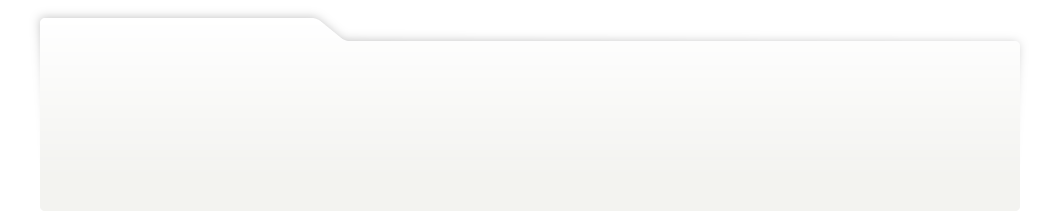
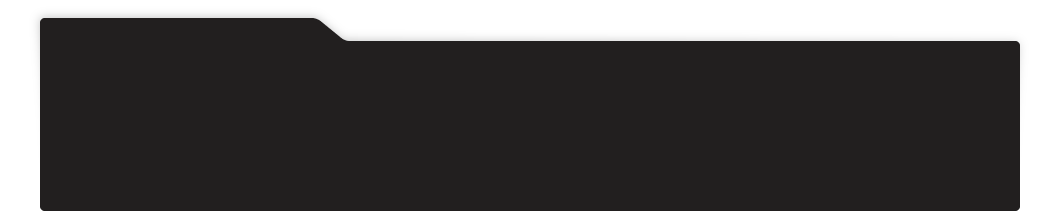
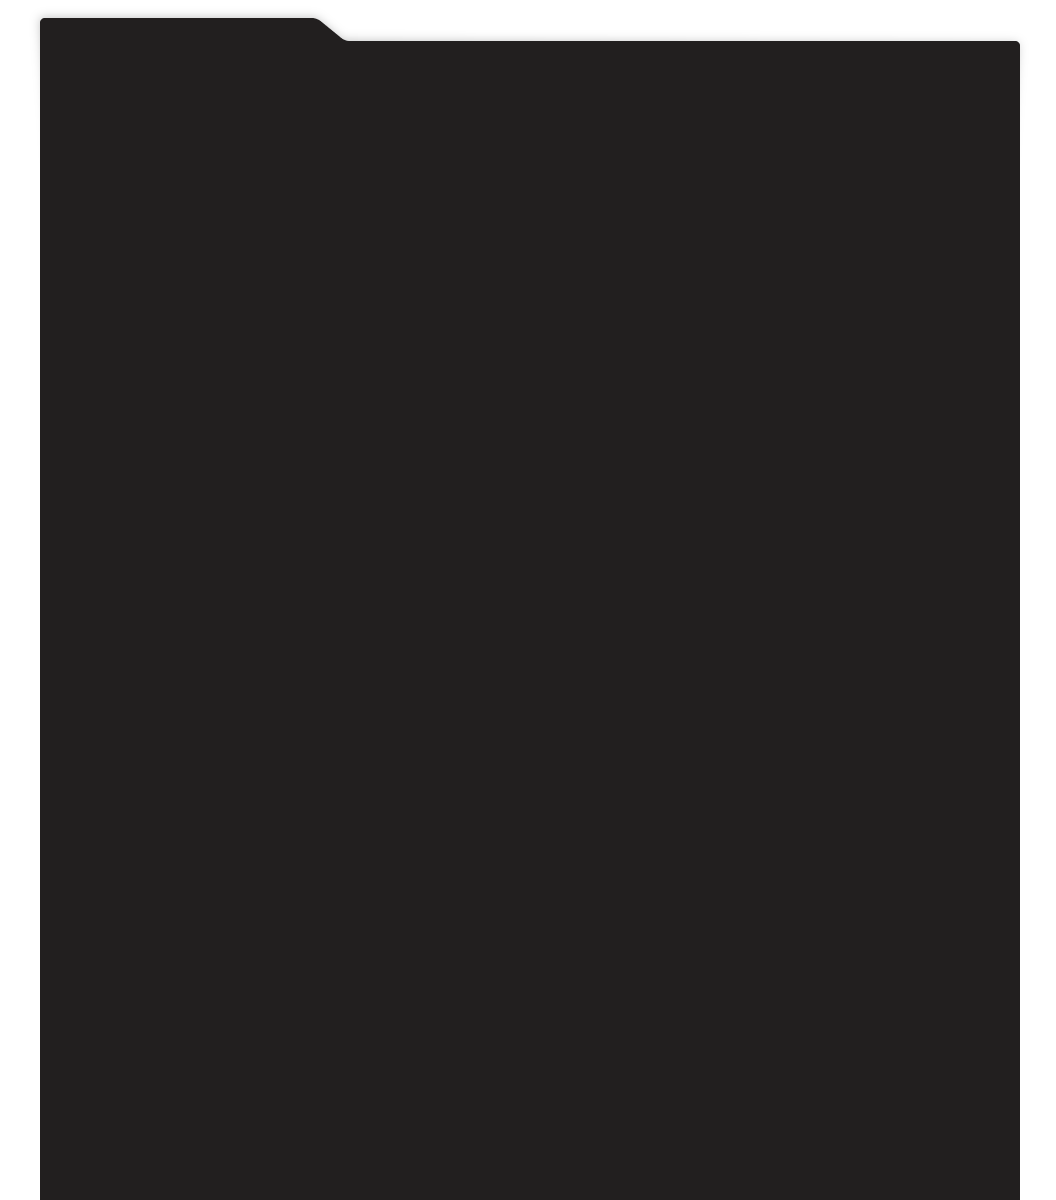
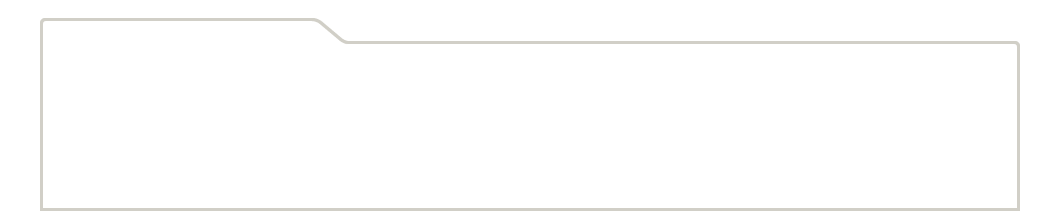
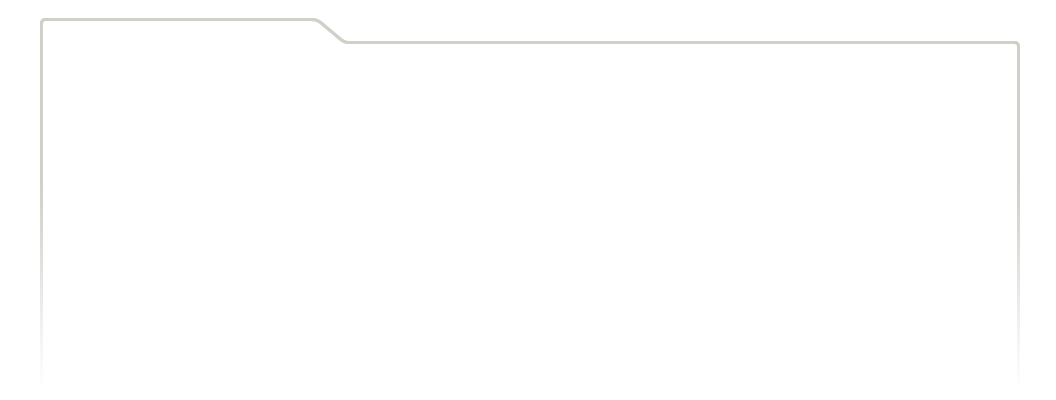
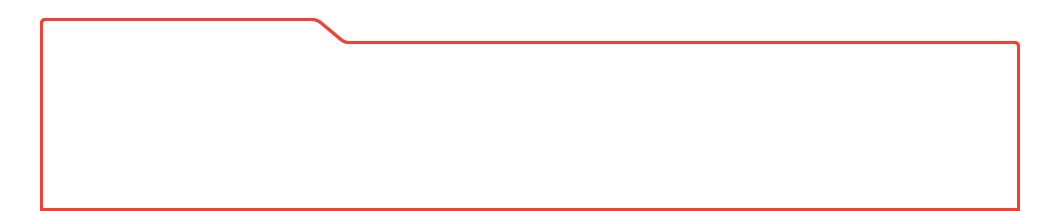
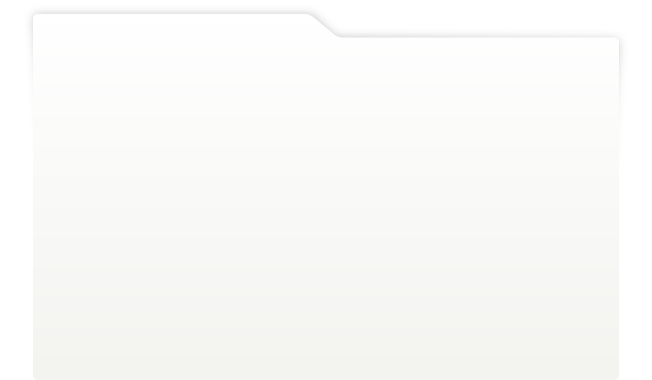
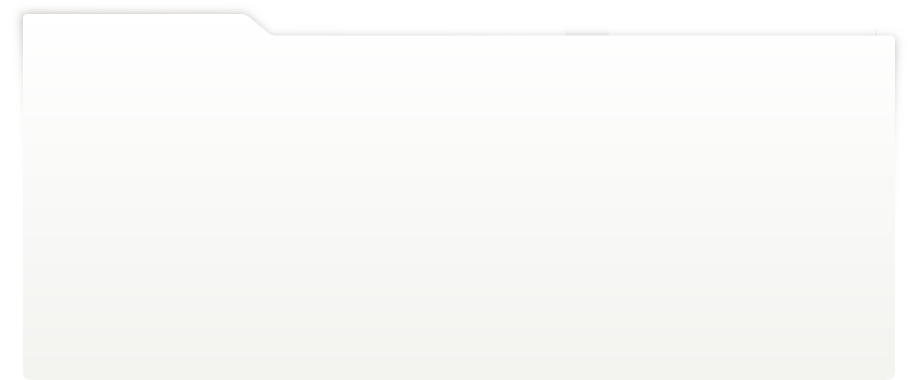
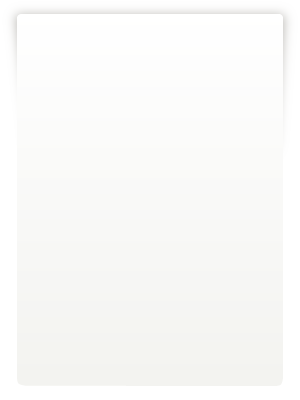
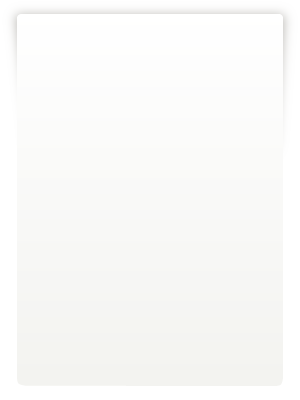
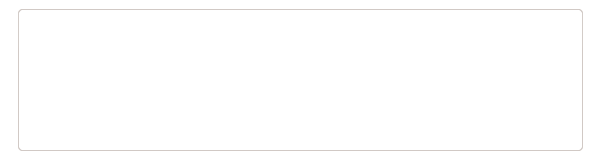
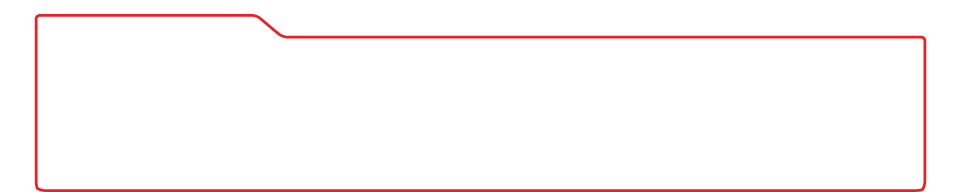
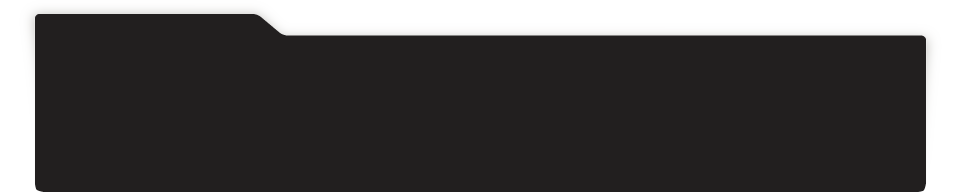
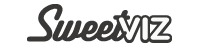
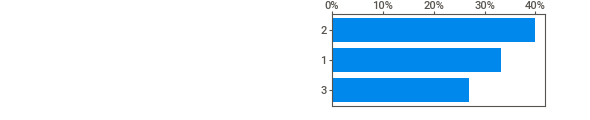
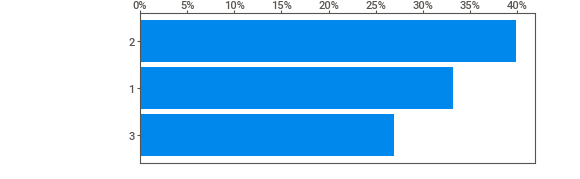
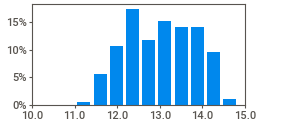
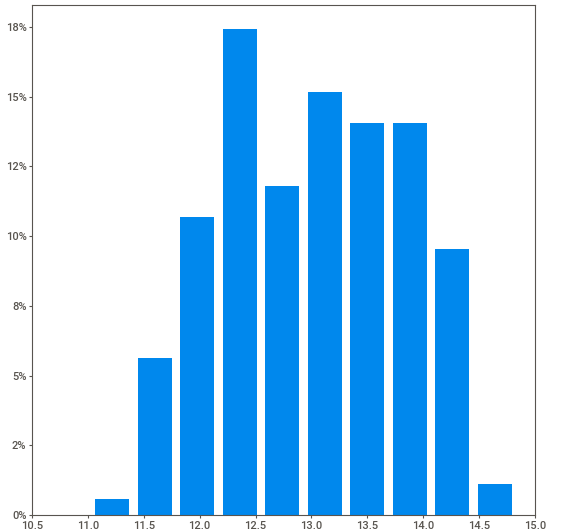
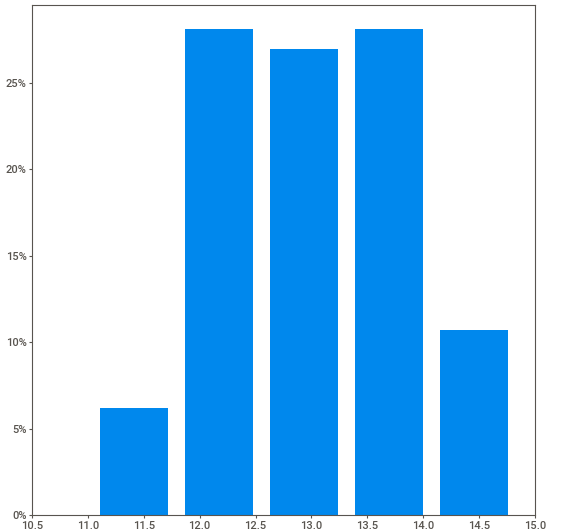
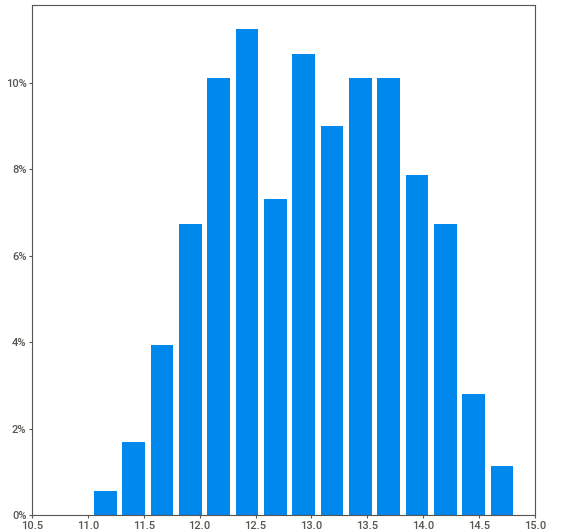
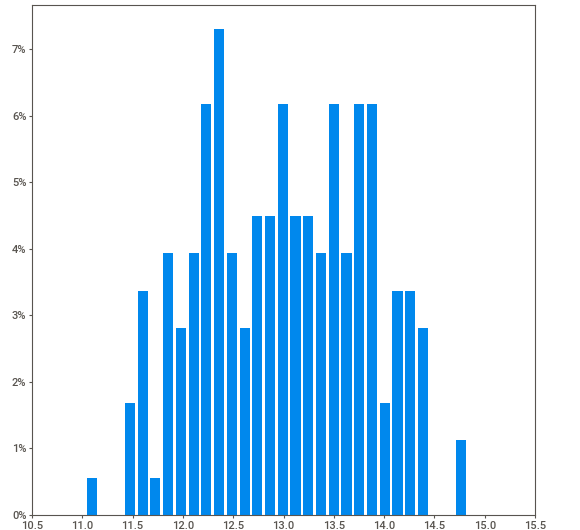
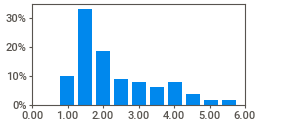
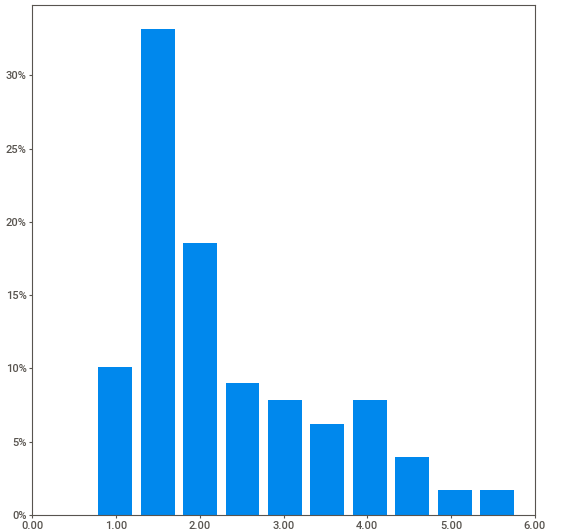
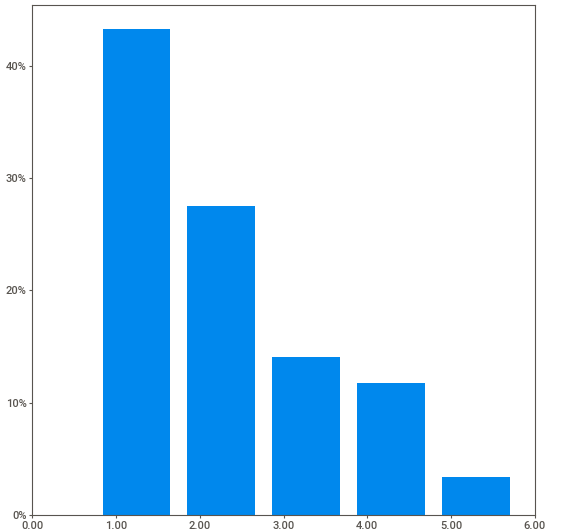
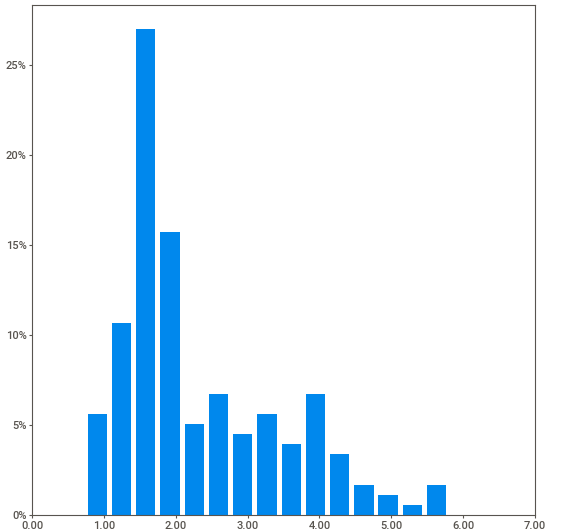
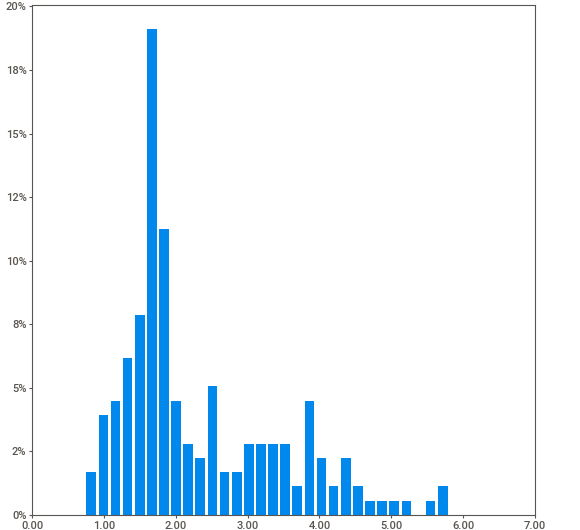
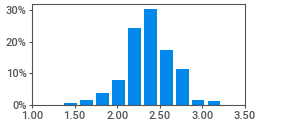
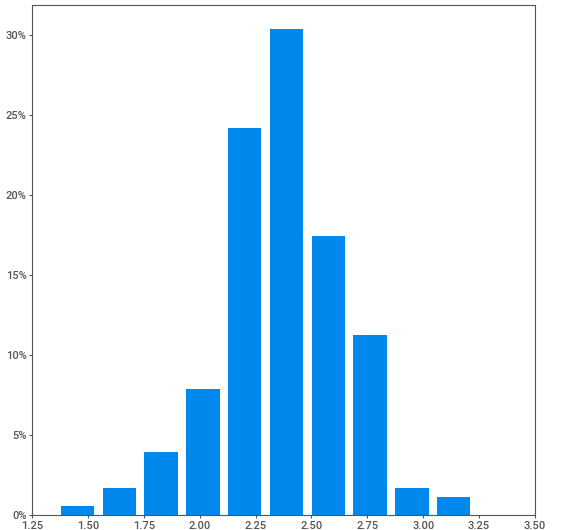
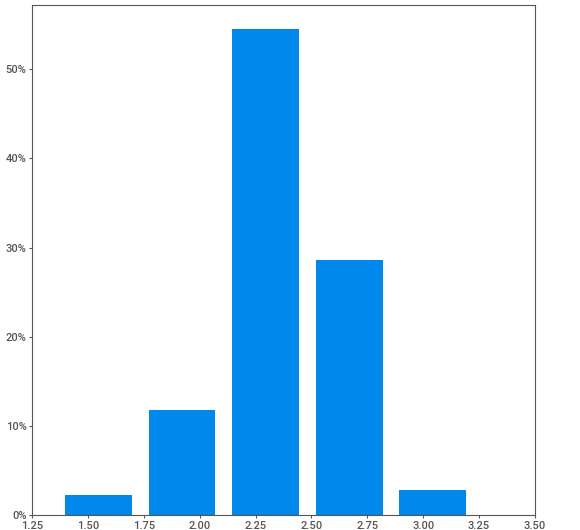
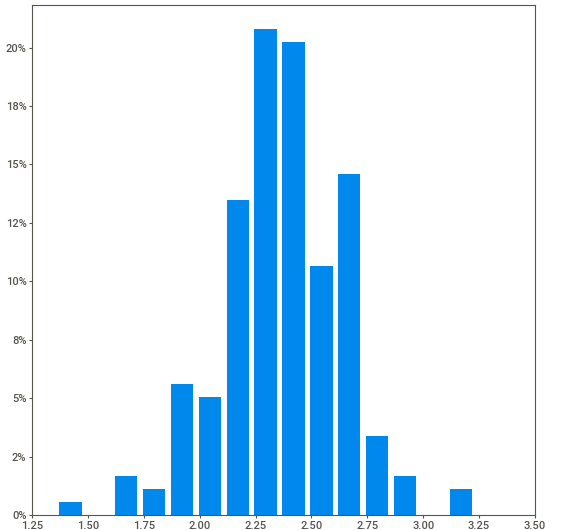
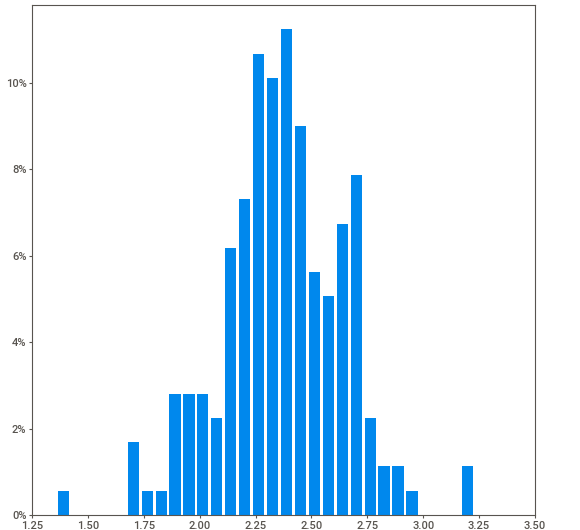
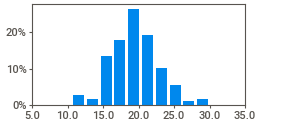
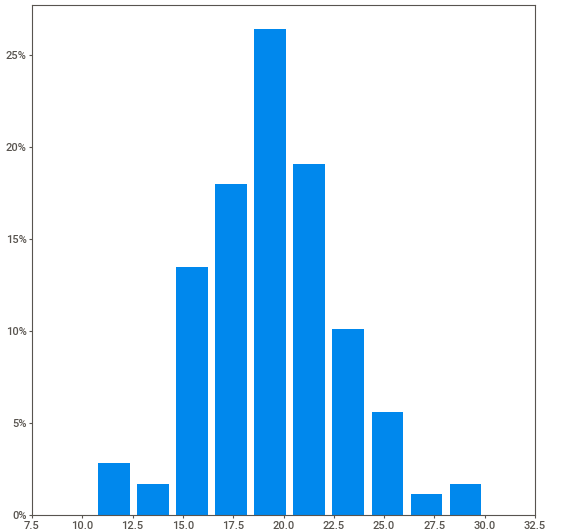
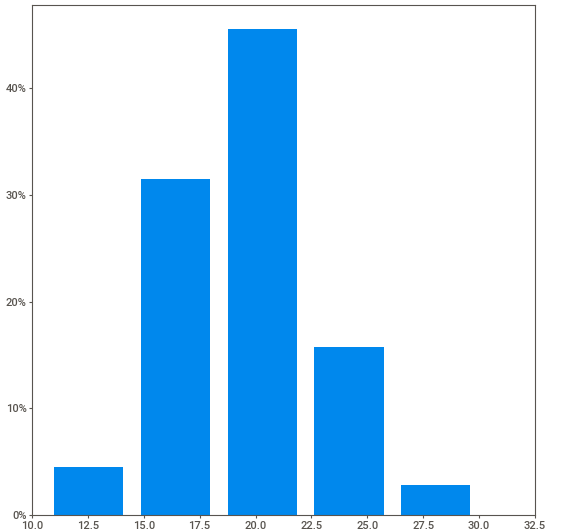
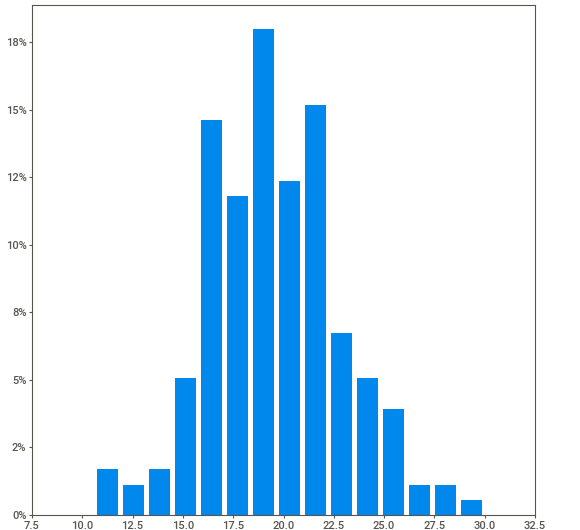
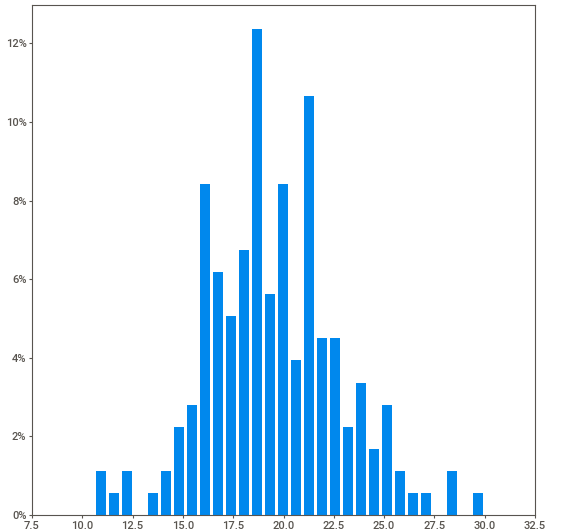
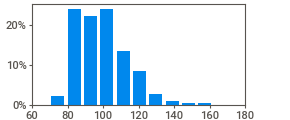
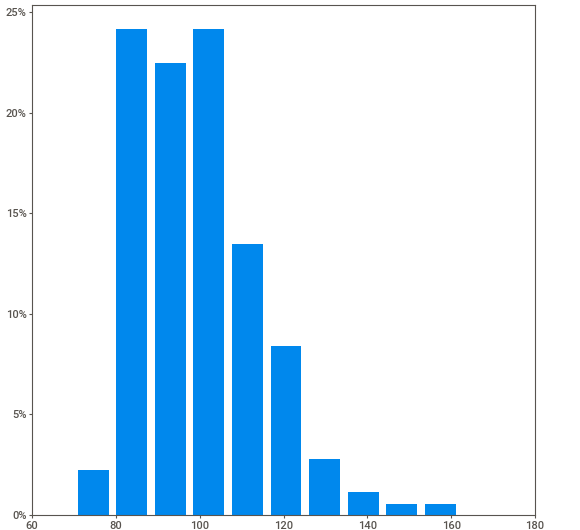
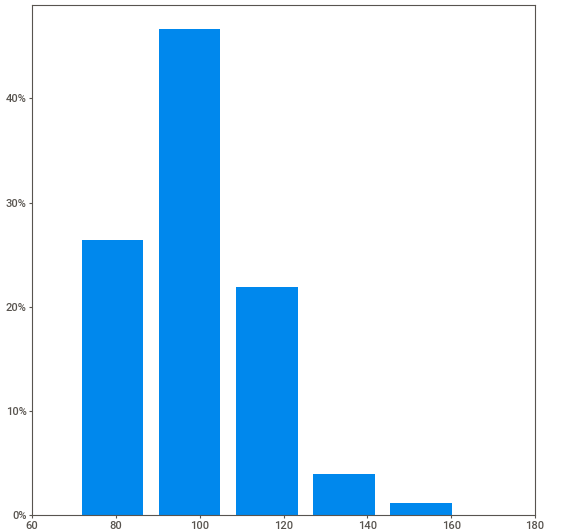
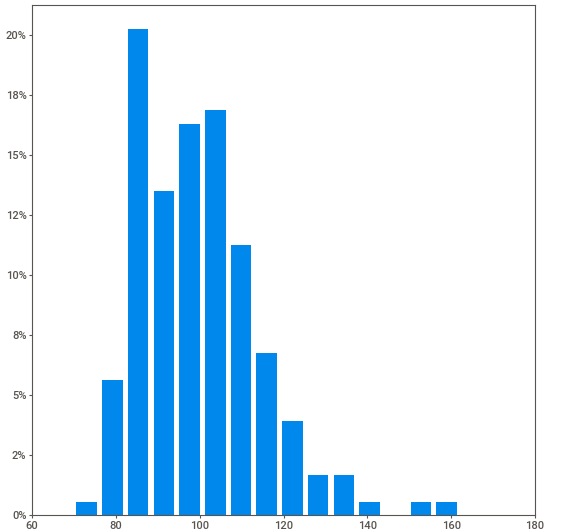
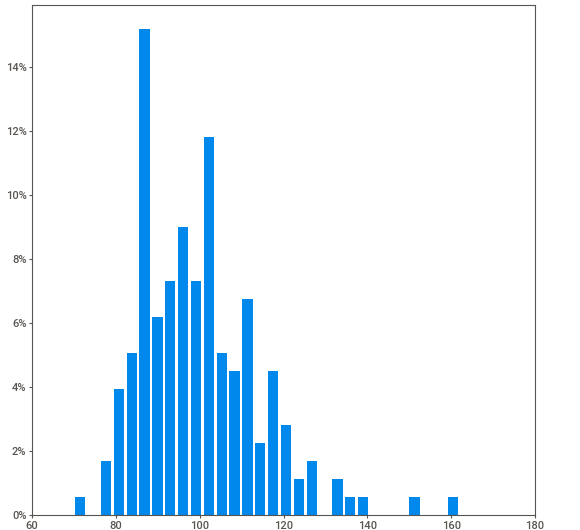
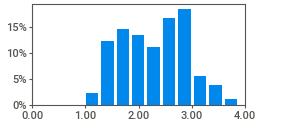
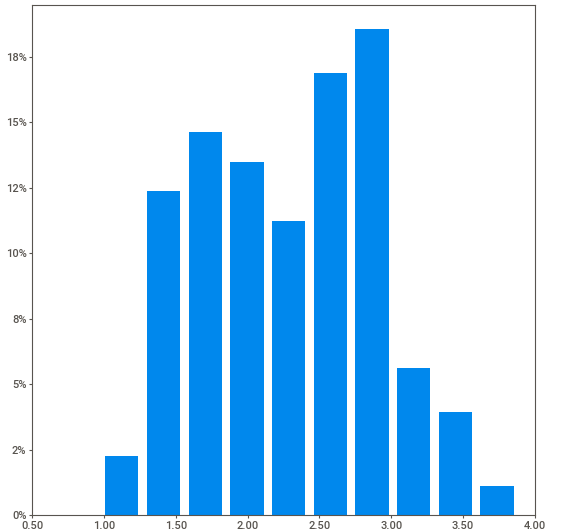
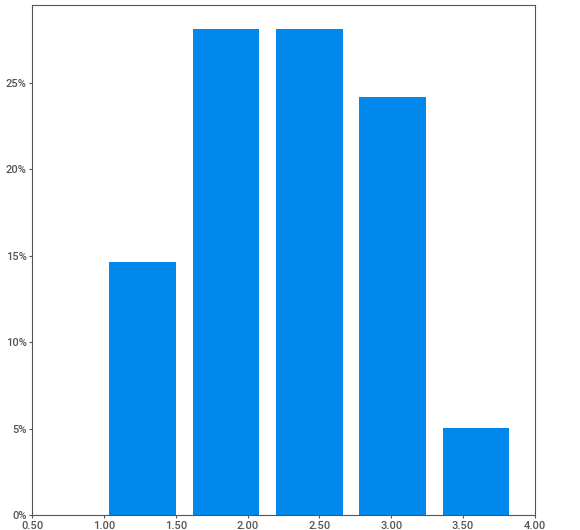
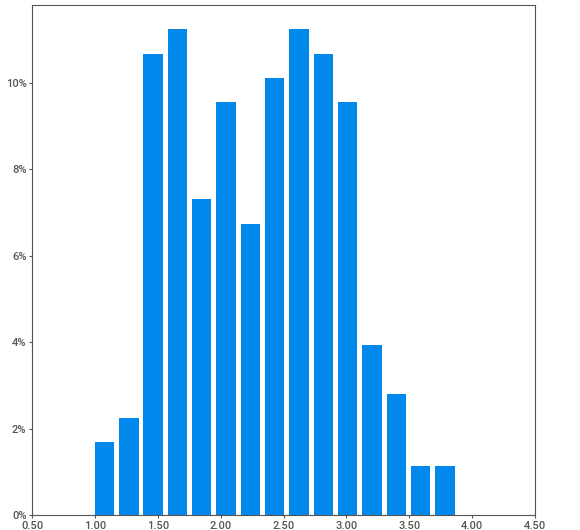
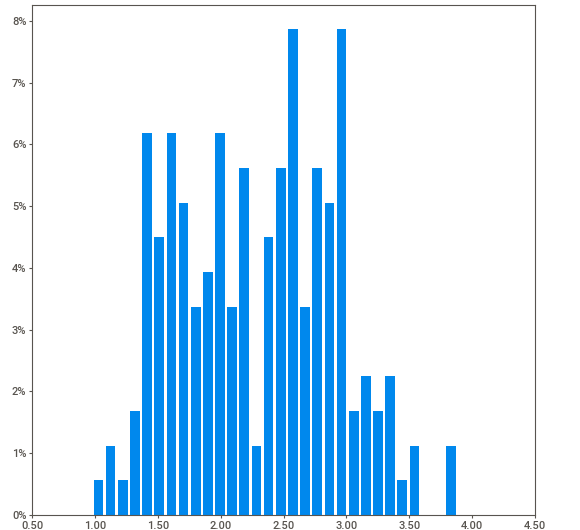
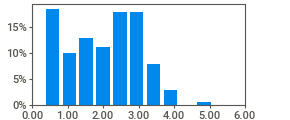
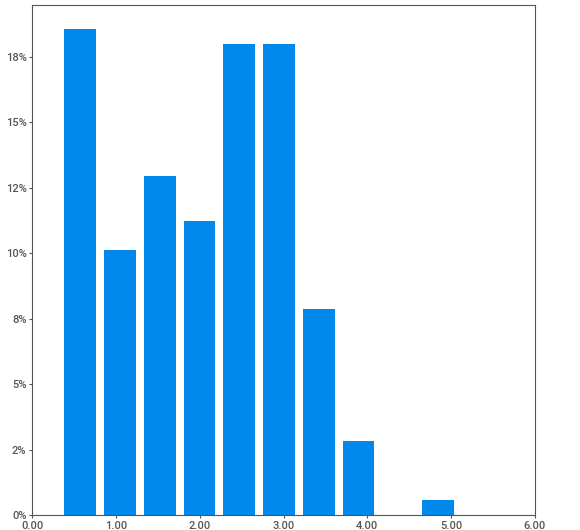
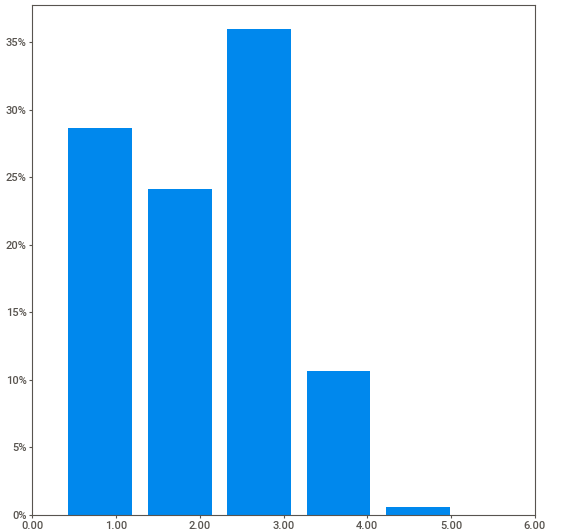
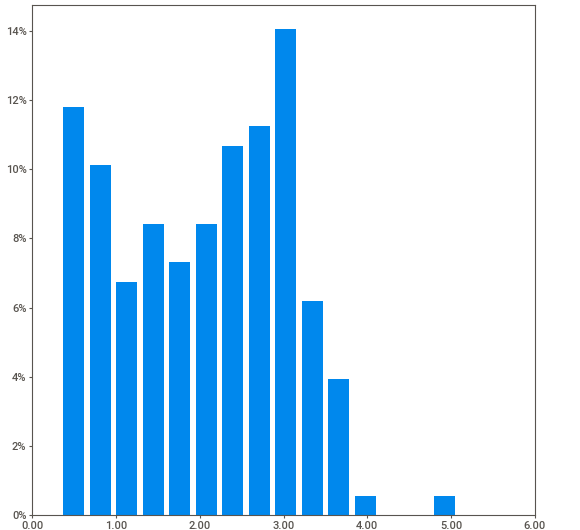
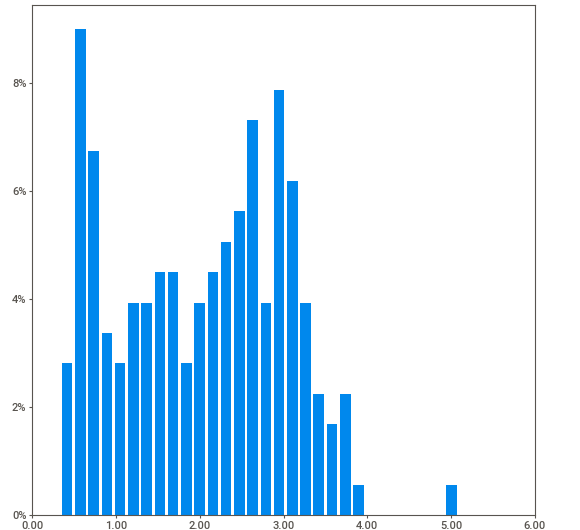
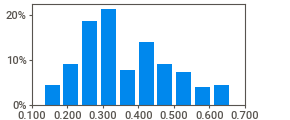
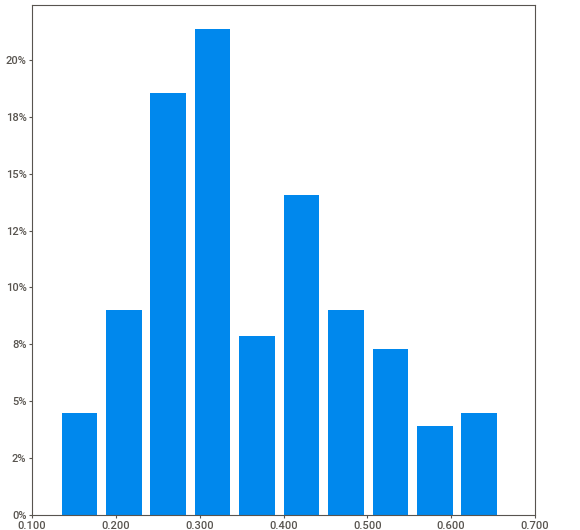
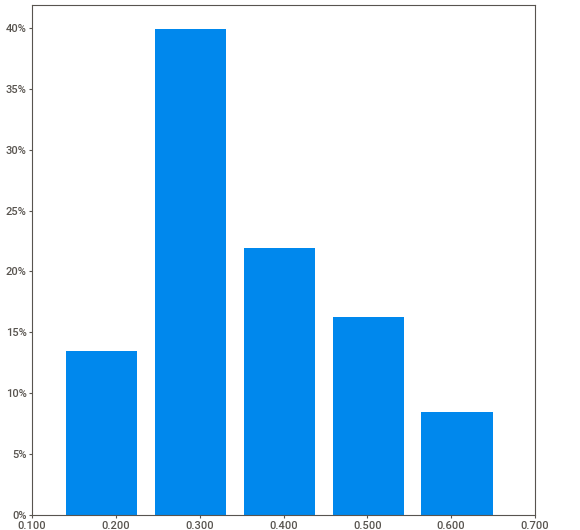
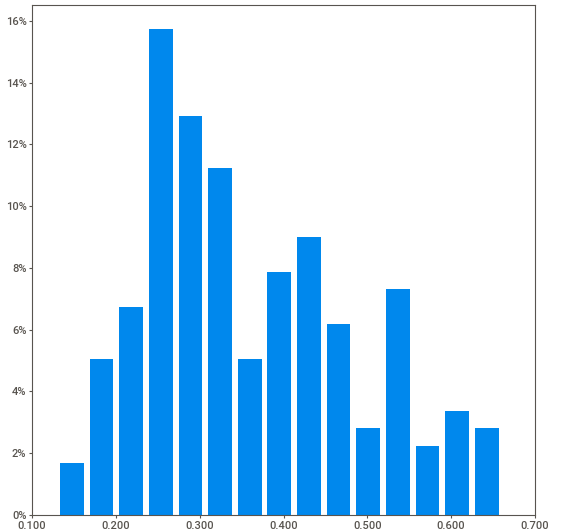
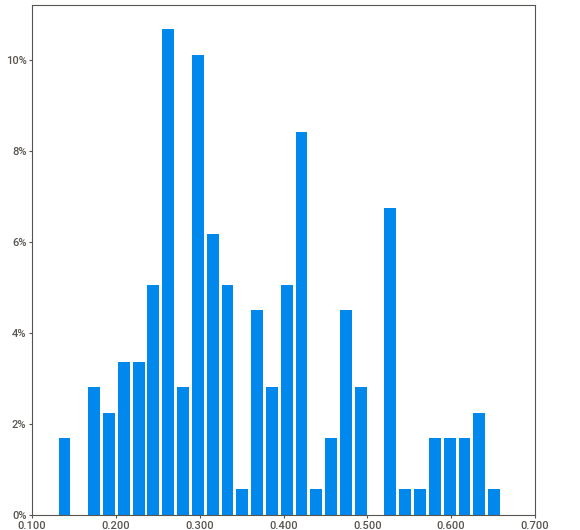
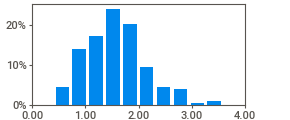
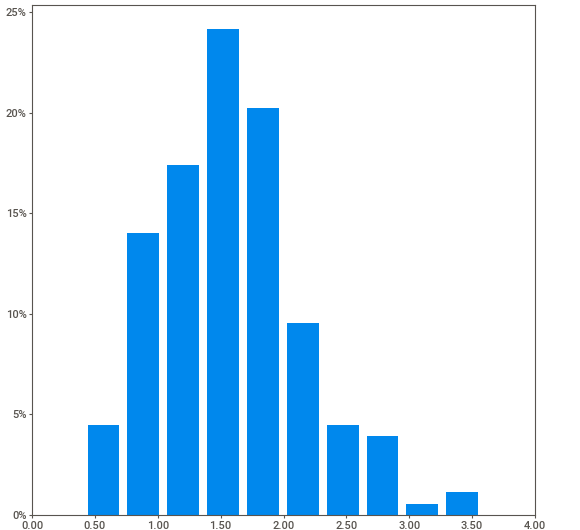
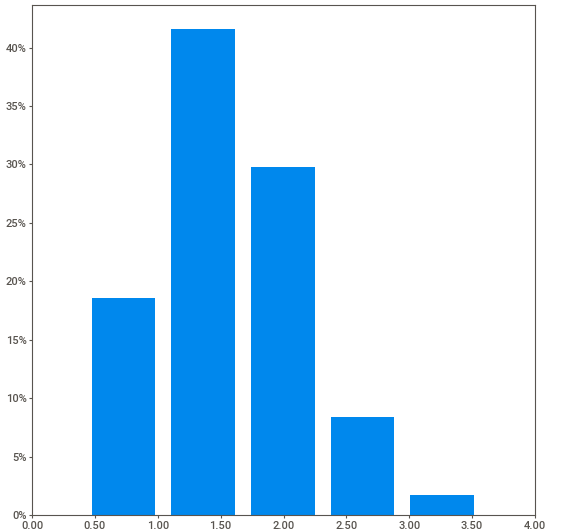
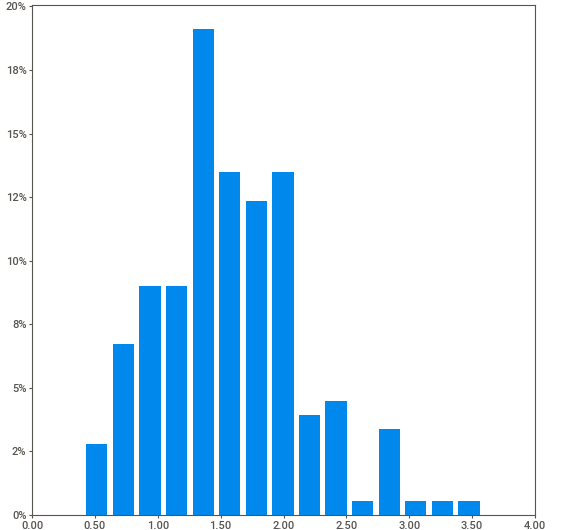
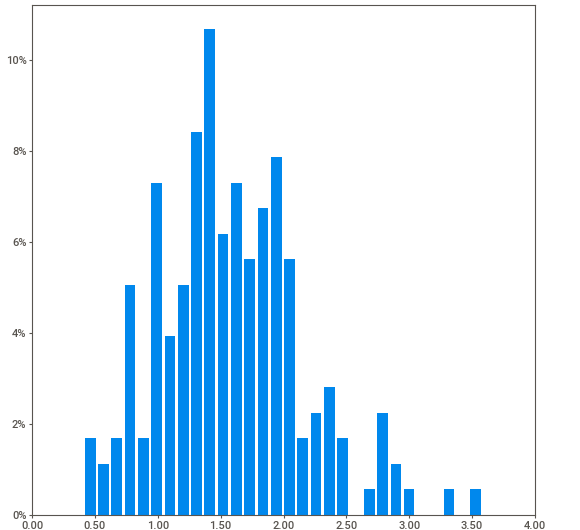
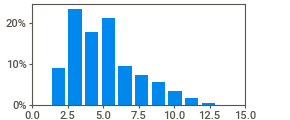
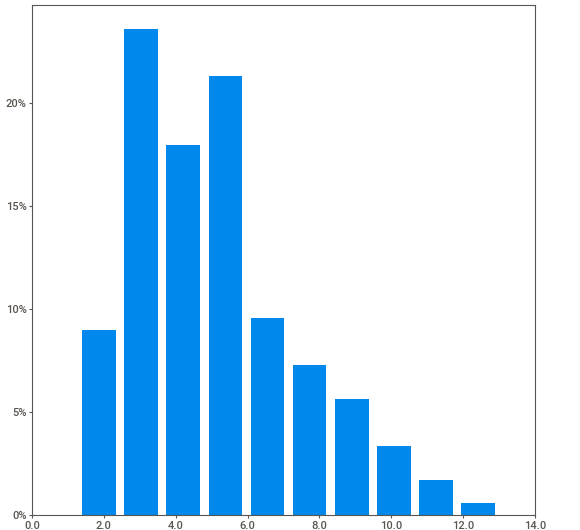
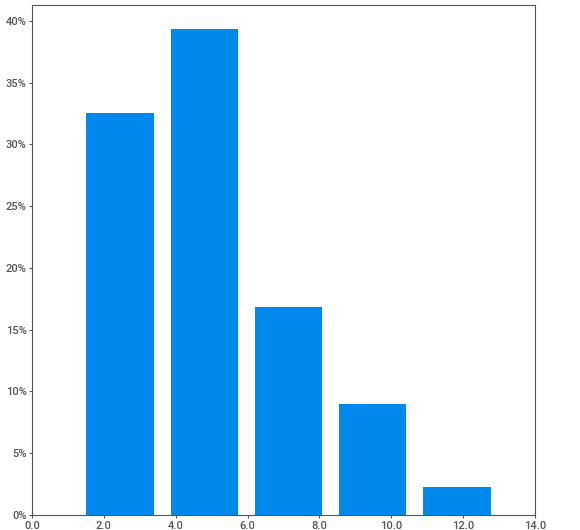
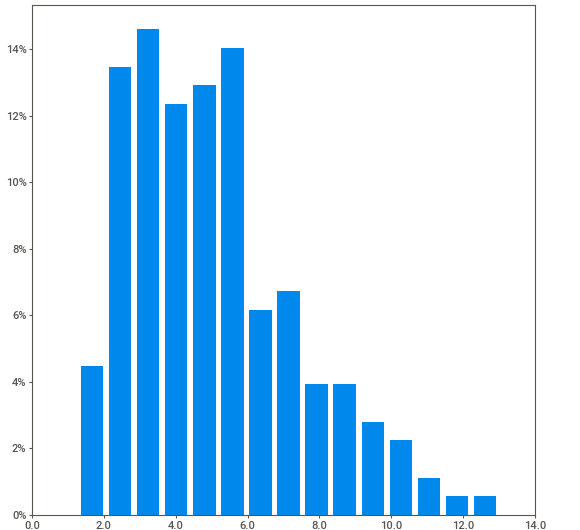
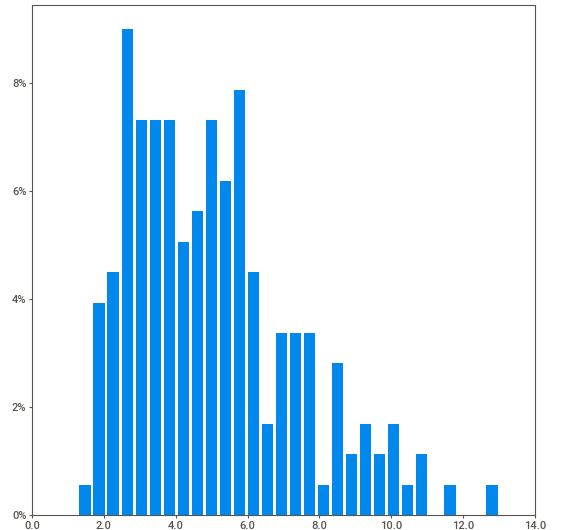
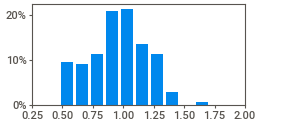
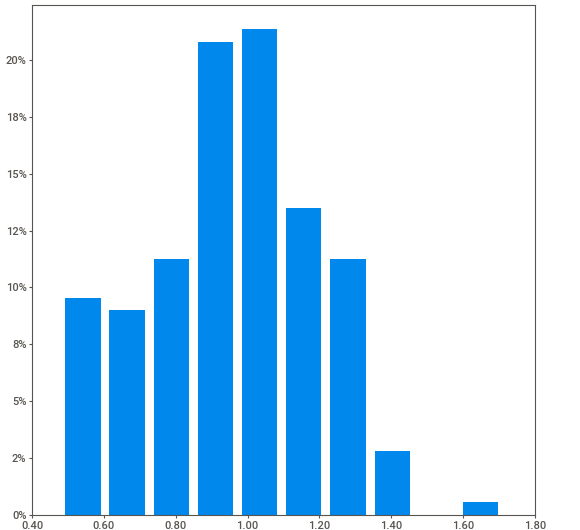
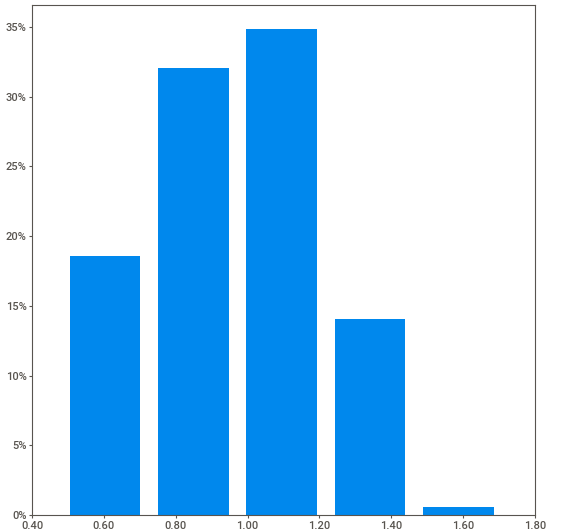
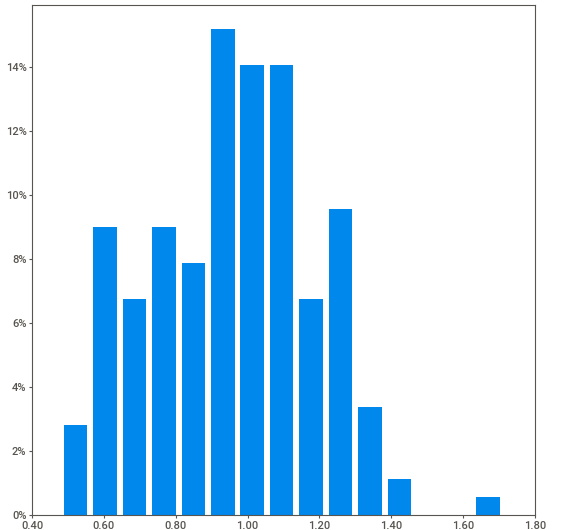
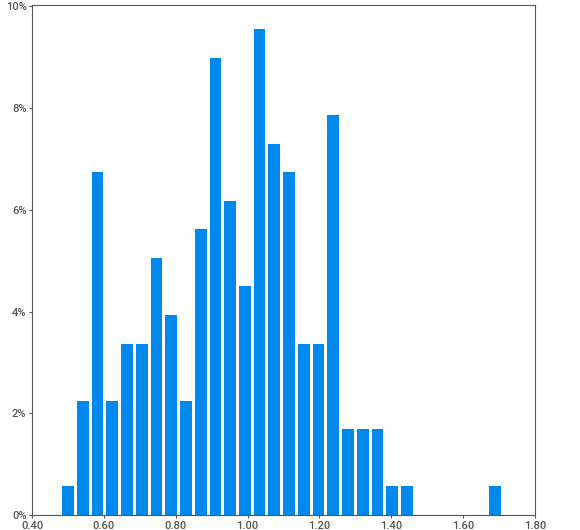
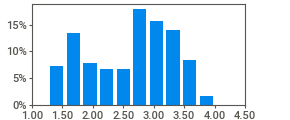
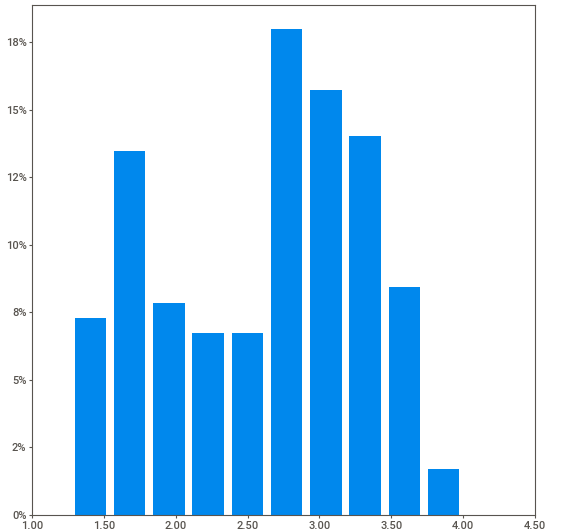
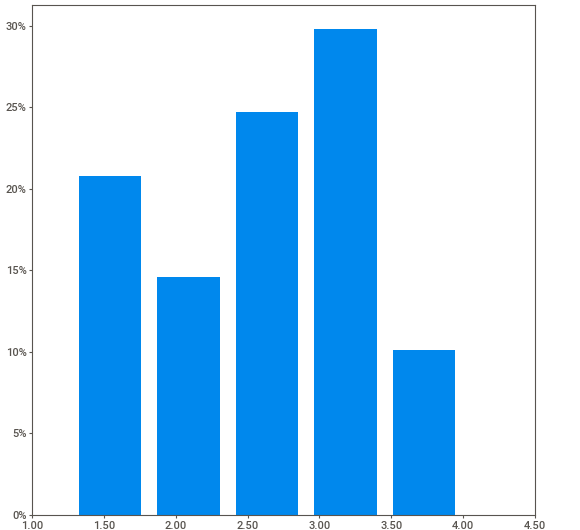
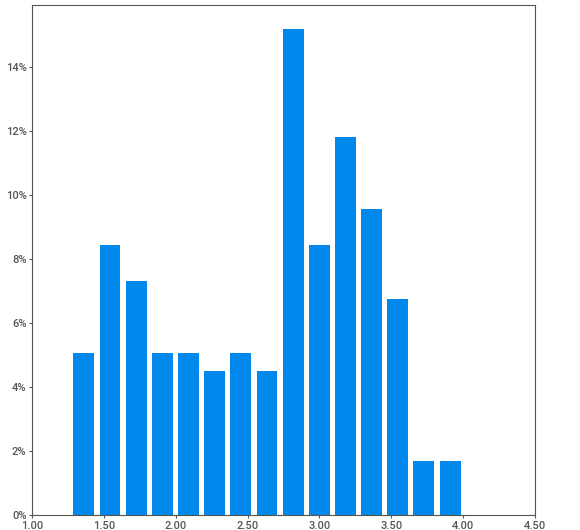
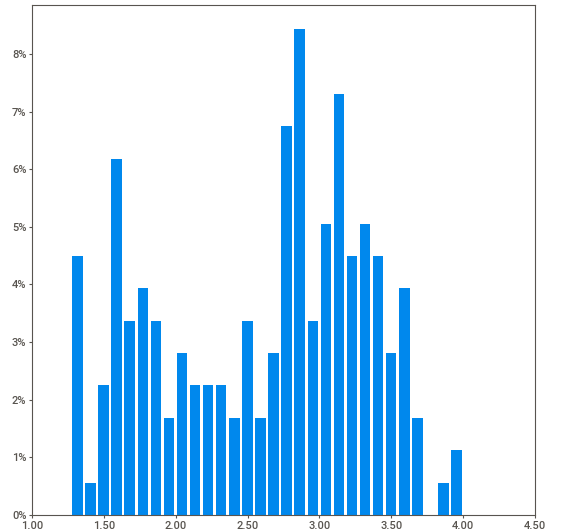
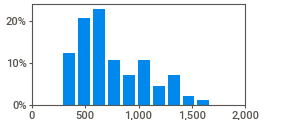
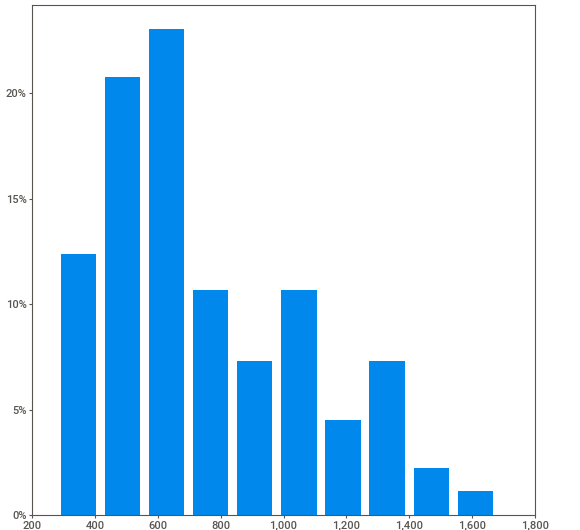
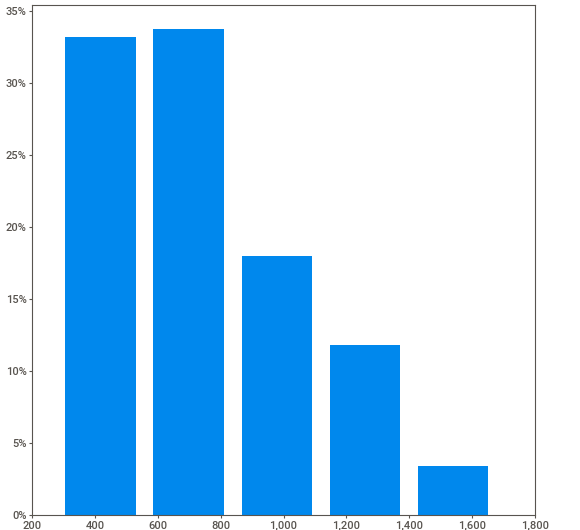
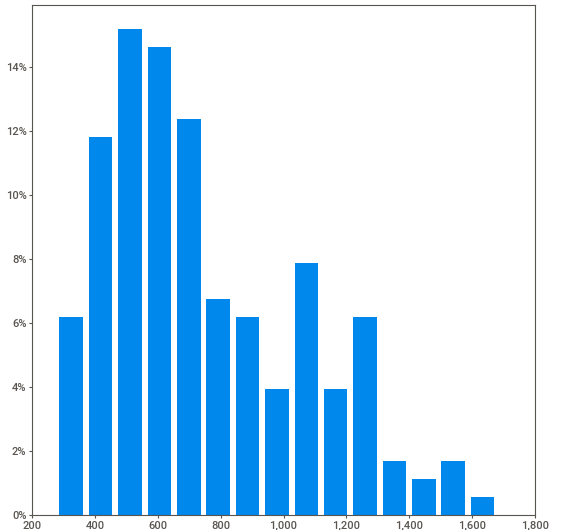
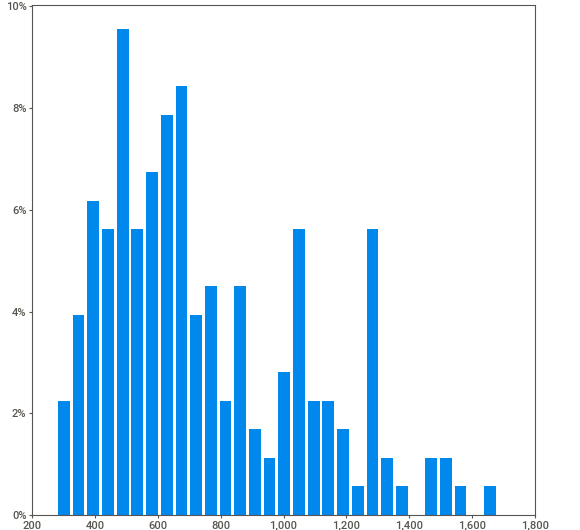
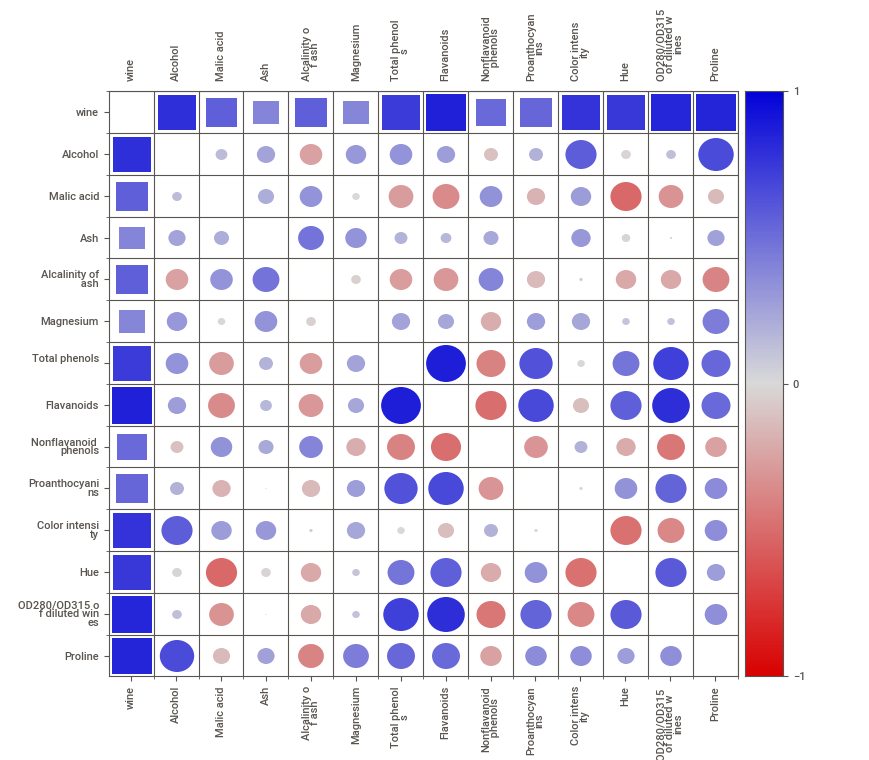
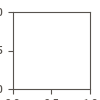

In [10]:
import sweetviz as sv
report=sv.analyze(df)
report.show_notebook()

In [11]:
df.isnull().sum()

wine                            0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [12]:
for i in df: #There is no objects in this wine function
    if df[i].dtype == "O":
        print(i) 

# EDA

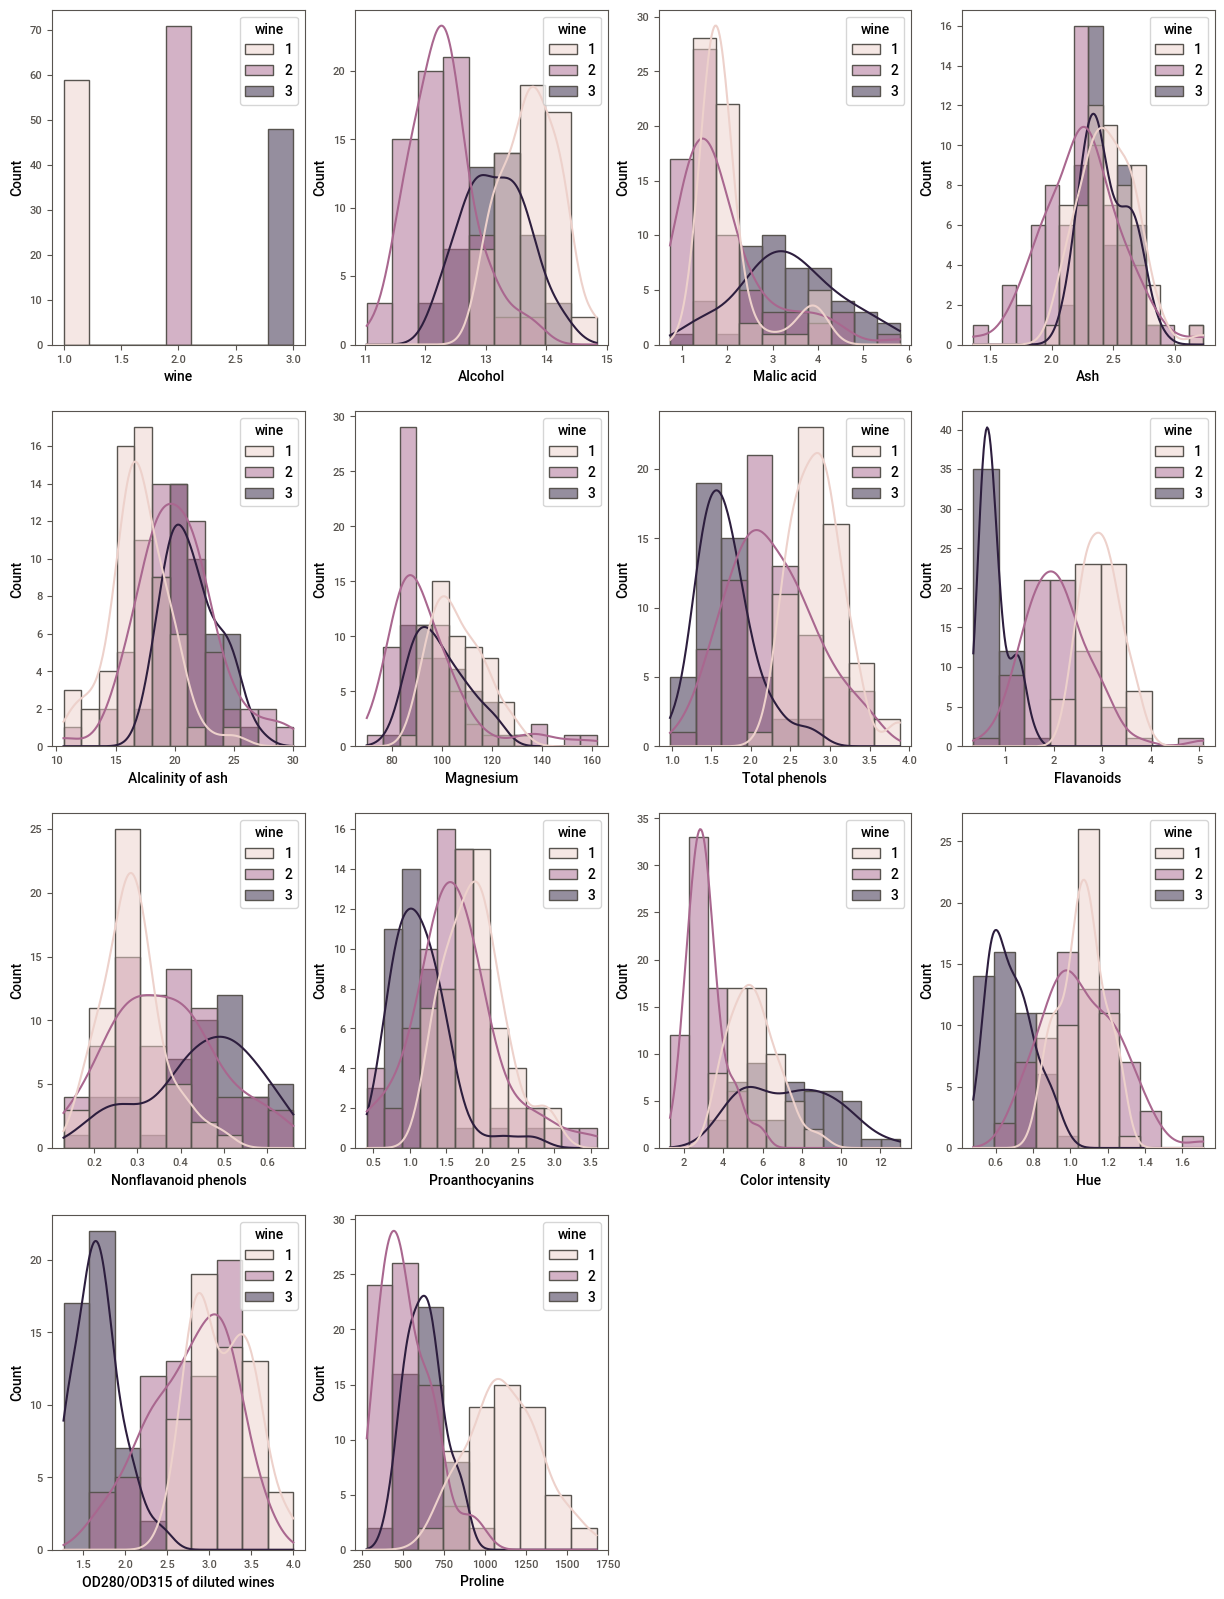

In [13]:
plt.figure(figsize=(15,20))
pltno=1
for i in df:
    plt.subplot(4,4,pltno)
    sns.histplot(kde = True, x=i, hue="wine",data=df)
    pltno+=1

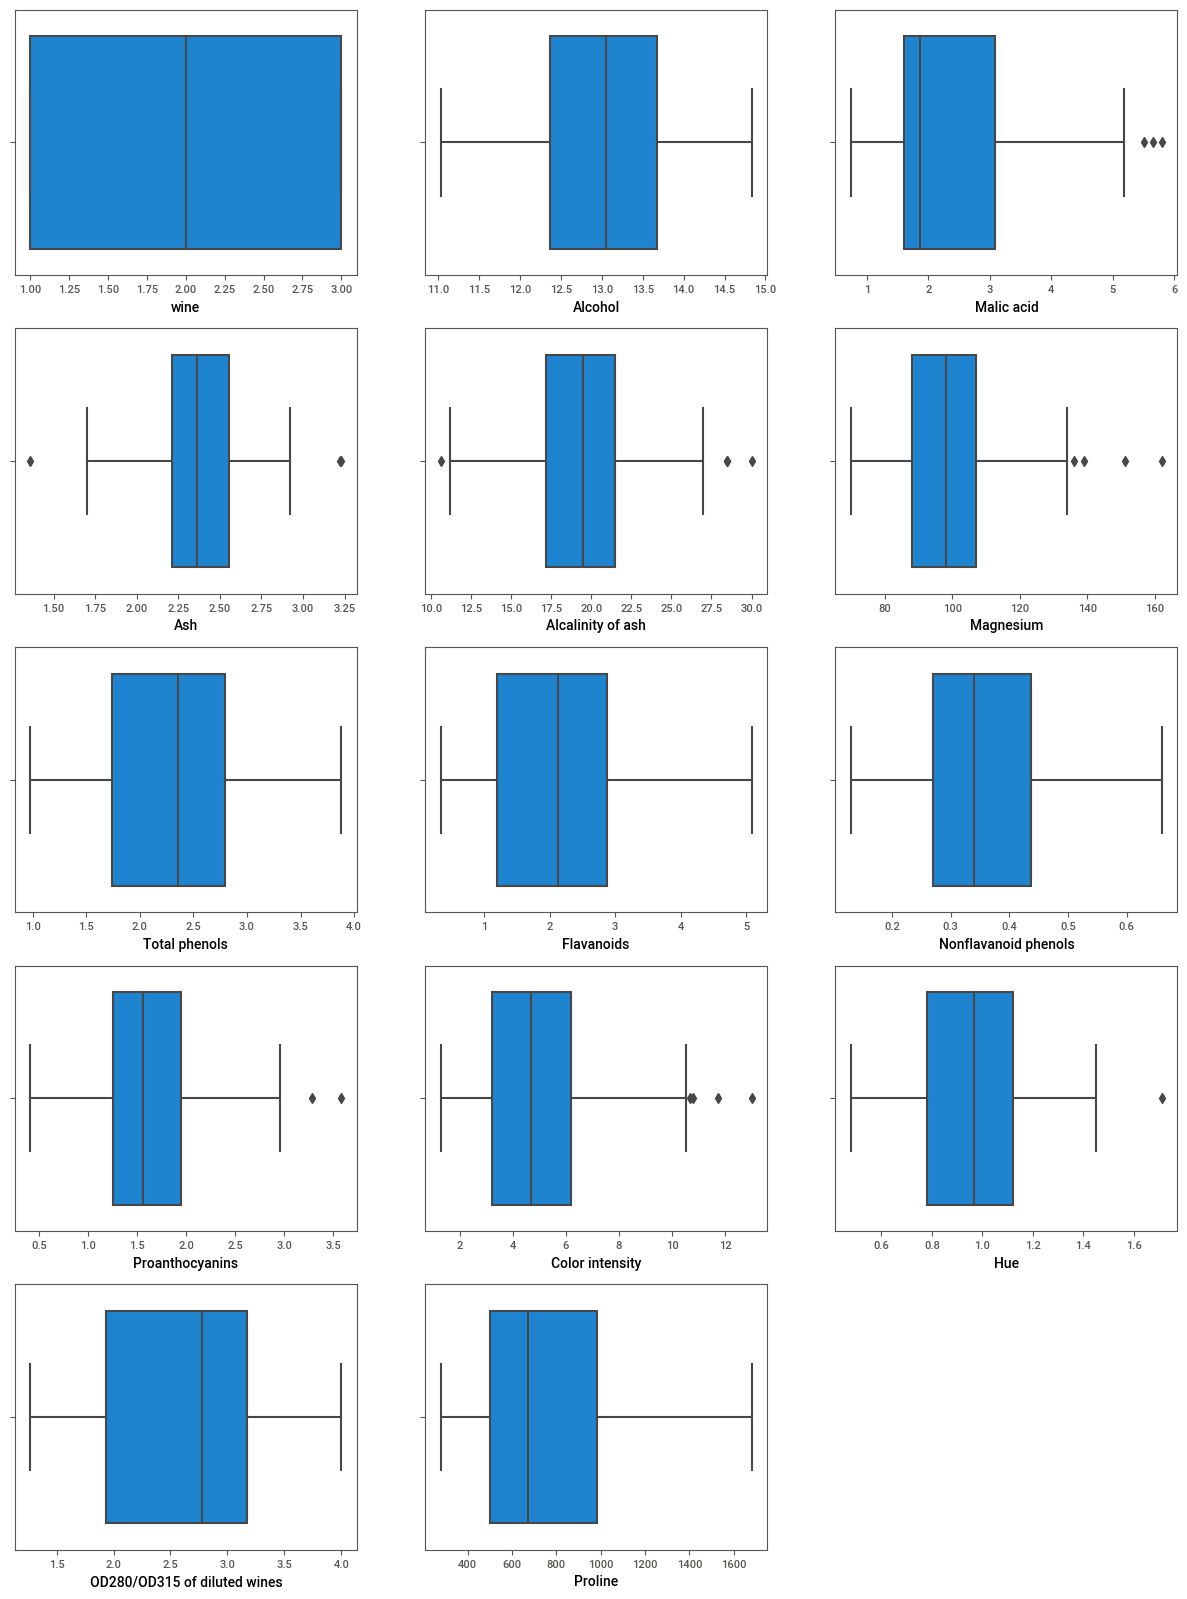

In [14]:
plt.figure(figsize=(15,20))
pltno=1
for i in df:
    plt.subplot(5,3,pltno)
    sns.boxplot(x=i, hue="wine",data=df)
    pltno+=1

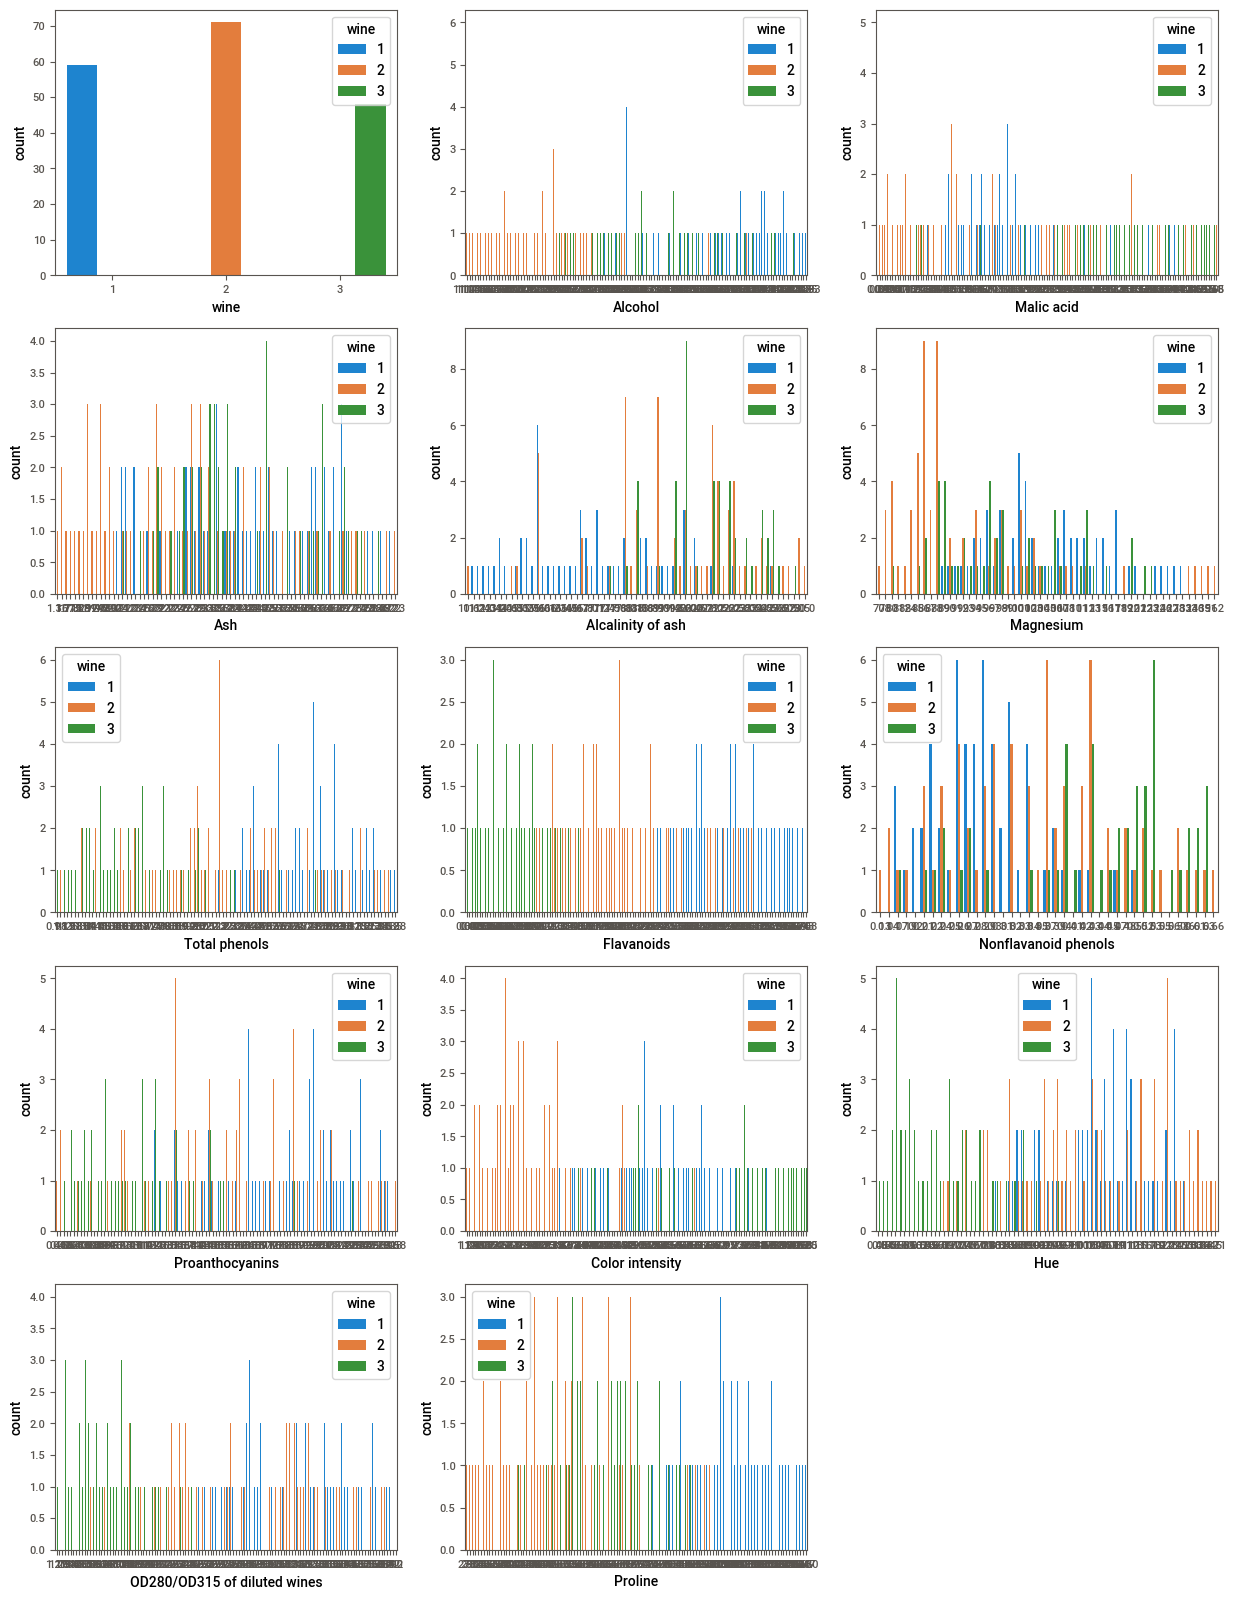

In [15]:
plt.figure(figsize=(15,20))
pltno=1
for i in df:
    plt.subplot(5,3,pltno)
    sns.countplot(x=i, hue="wine",data=df)
    pltno+=1

In [16]:
df.loc[df.Magnesium>135] #there are four outliers in magnesium

wine  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
69     2    12.21        1.19  1.75               16.8        151   
73     2    12.99        1.67  2.60               30.0        139   
78     2    12.33        0.99  1.95               14.8        136   
95     2    12.47        1.52  2.20               19.0        162   

    Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
69           1.85        1.28                  0.14             2.50   
73           3.30        2.89                  0.21             1.96   
78           1.90        1.85                  0.35             2.76   
95           2.50        2.27                  0.32             3.28   

    Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
69             2.85  1.28                          3.07      718  
73             3.35  1.31                          3.50      985  
78             3.40  1.06                          2.31      750  
95             2.60  1.16                          2.63      937

<Axes: xlabel='wine', ylabel='Density'>

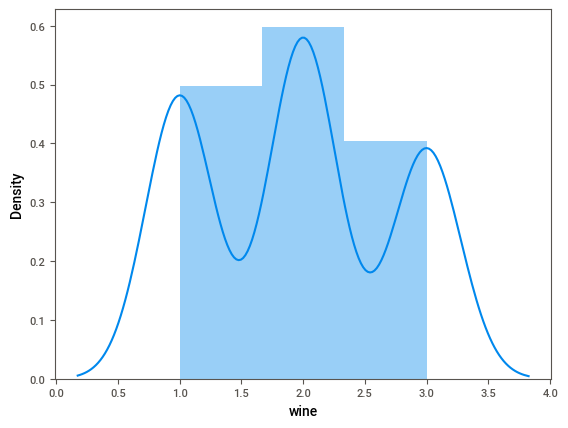

In [17]:
sns.distplot(df.wine)

In [18]:
print(df.loc[df.Magnesium].count()[0])

178


In [19]:
q1=np.percentile(df.Magnesium,25)
q3=np.percentile(df.Magnesium,75)
IQR=q3-q1
upper=q3+(1.5*IQR)
lower=q1-(1.5*IQR)
print(lower,q1,IQR,q3,upper)
print(max(df.Magnesium),min(df.Magnesium))

59.5 88.0 19.0 107.0 135.5
162 70


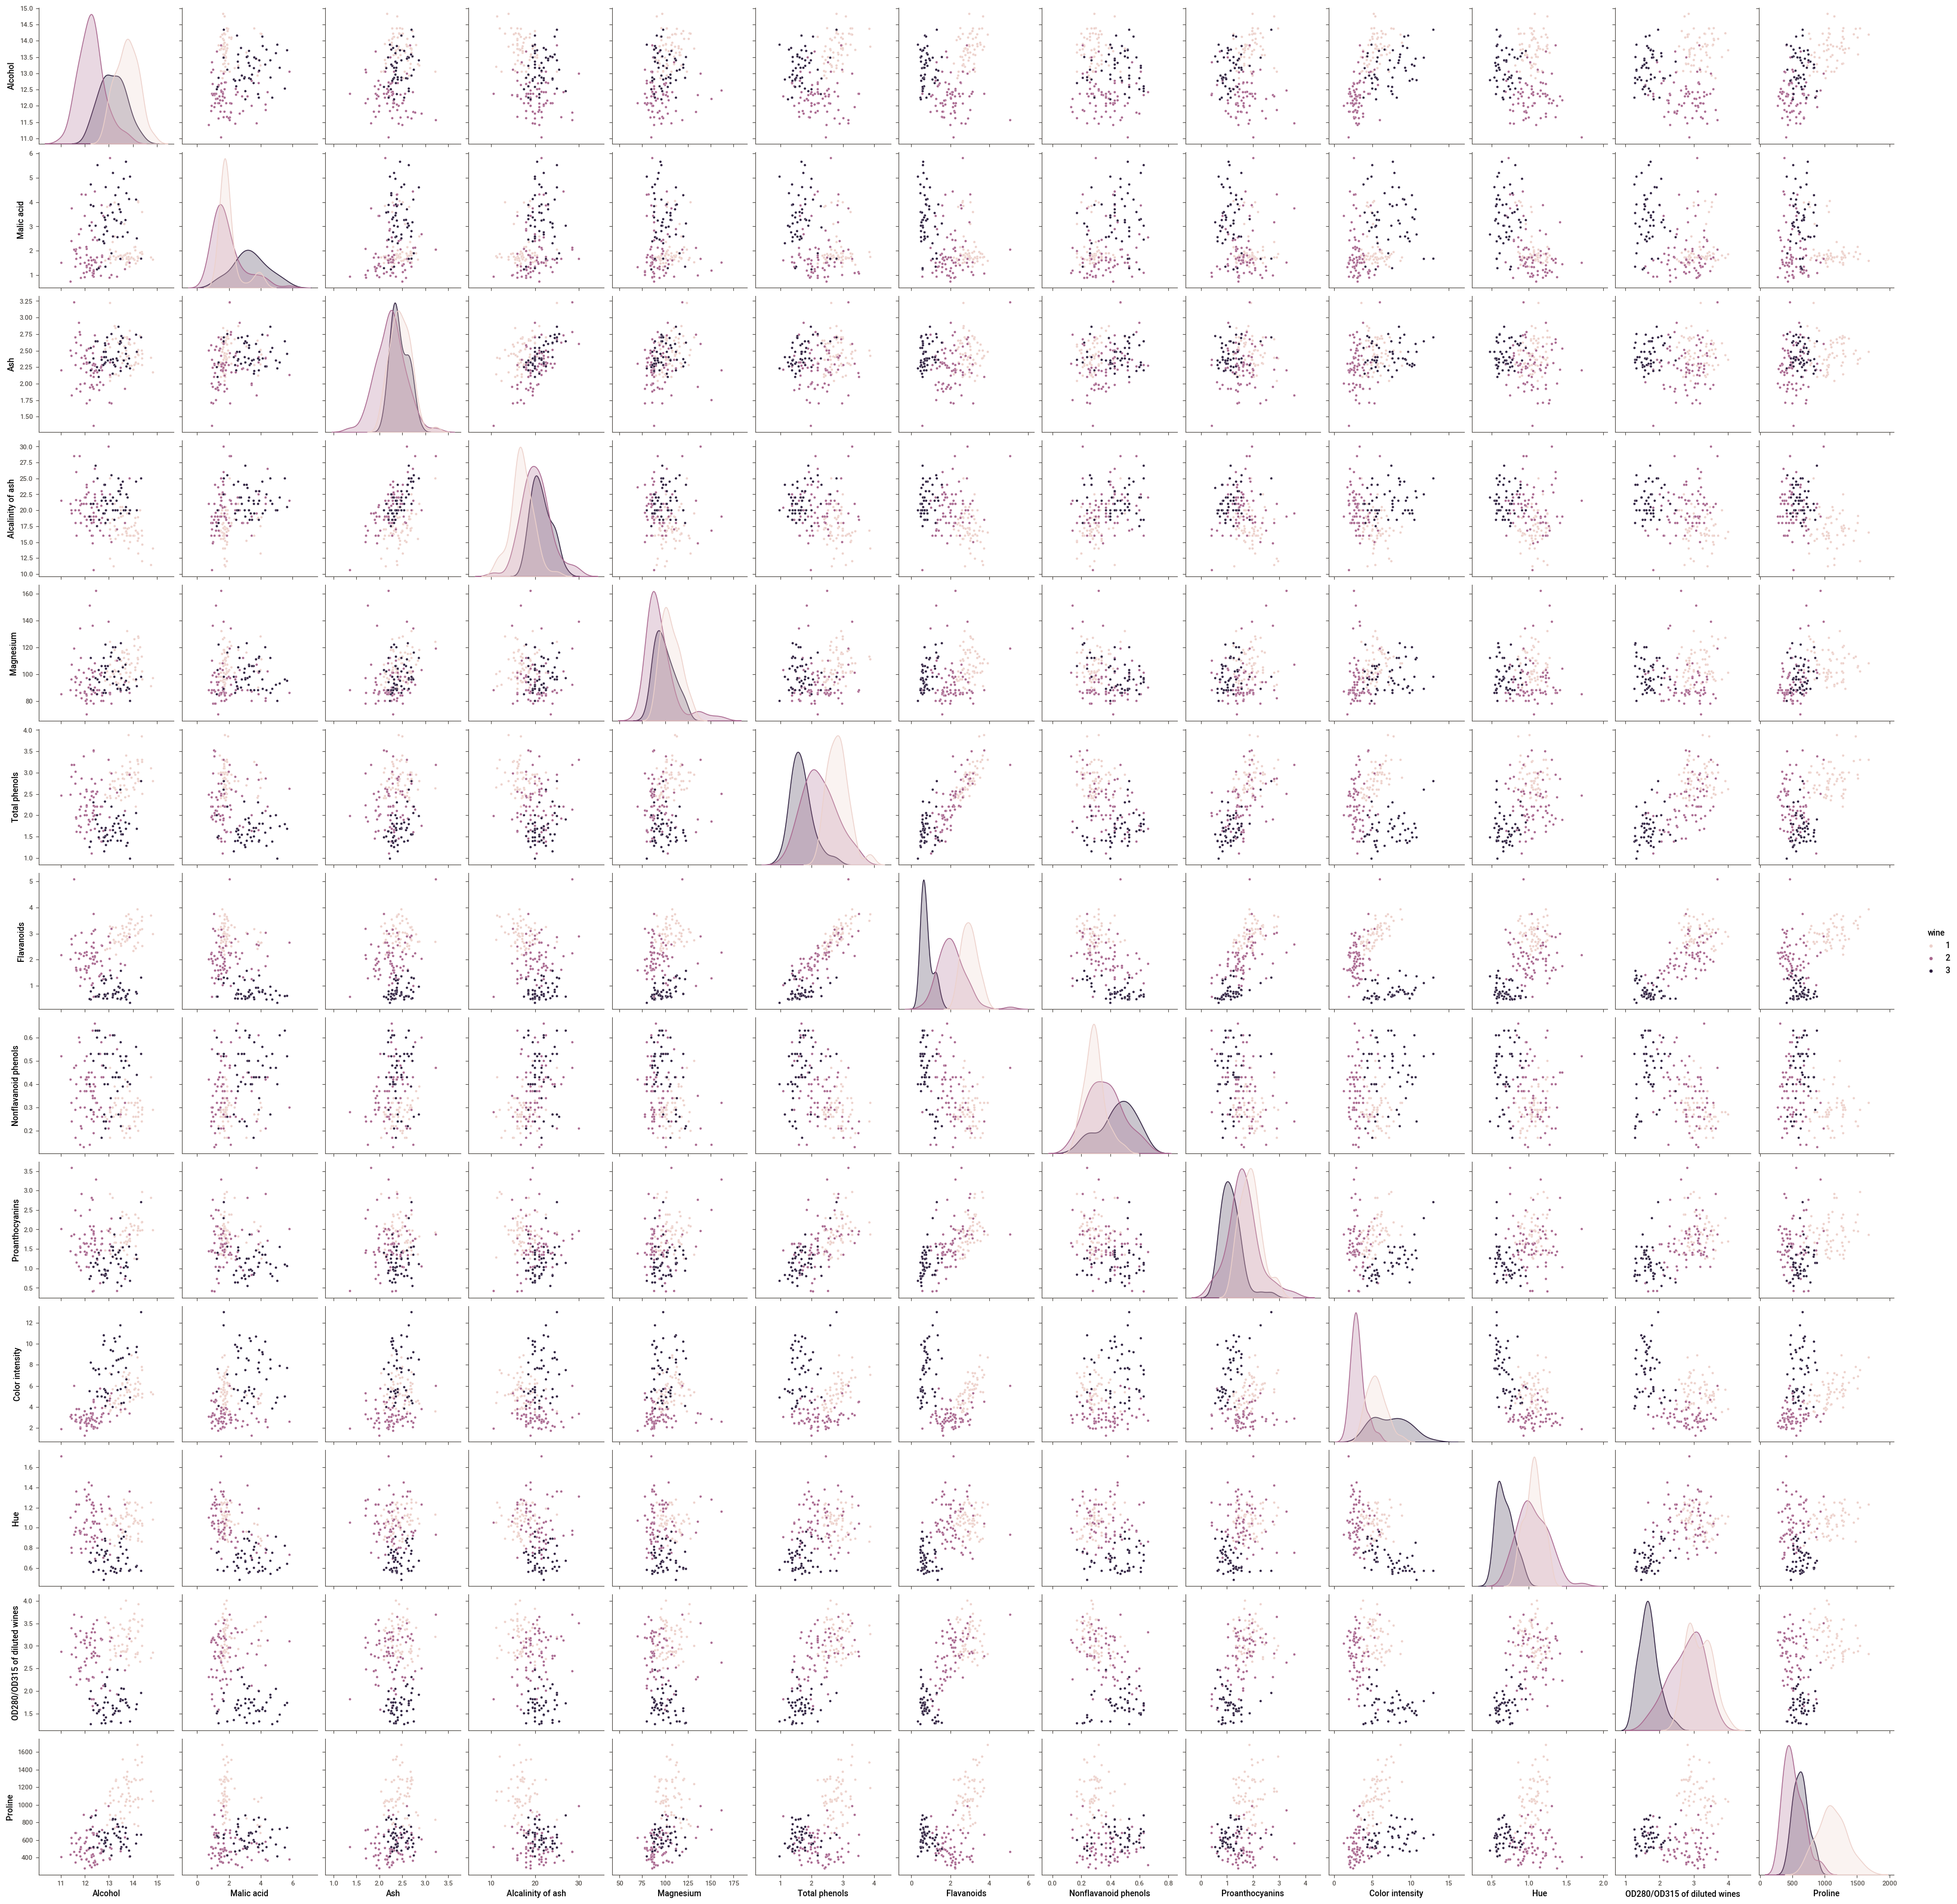

In [20]:
sns.pairplot(data=df, hue="wine")

<Axes: xlabel='Flavanoids', ylabel='OD280/OD315 of diluted wines'>

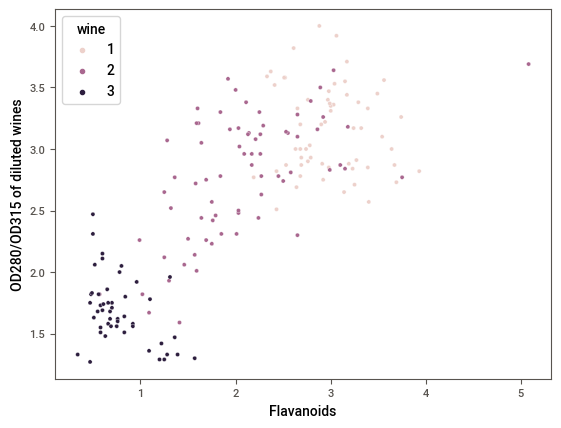

In [21]:
sns.scatterplot(x="Flavanoids",y="OD280/OD315 of diluted wines",data=df,hue="wine")

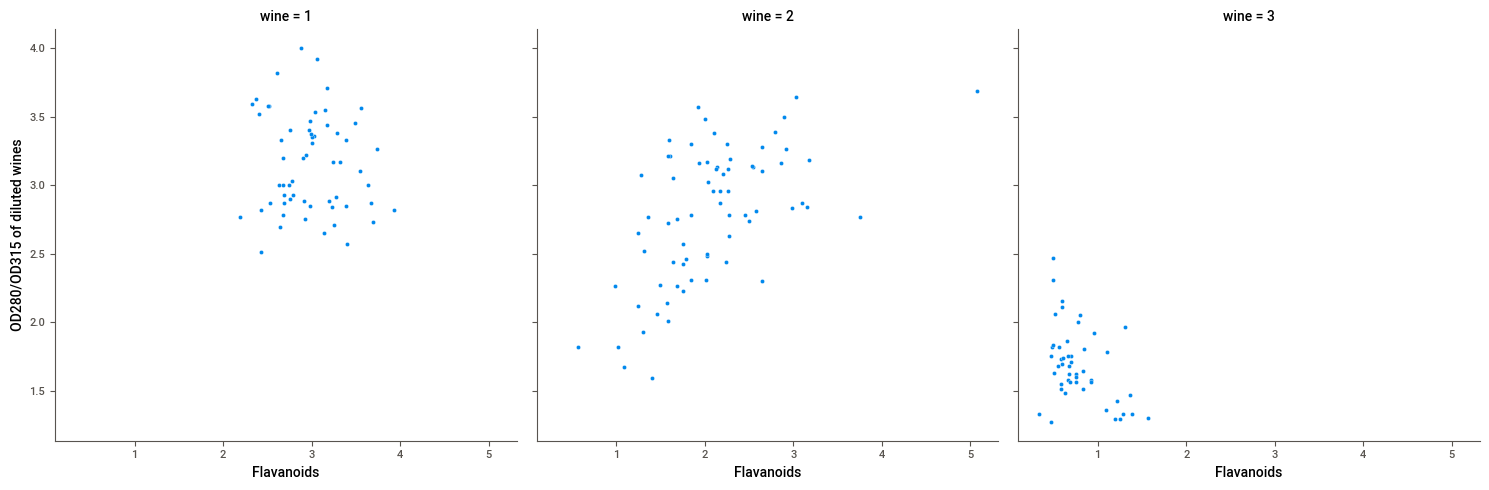

In [22]:
sns.relplot(x="Flavanoids",y="OD280/OD315 of diluted wines",data=df,col="wine")

# Preprocessing

In [23]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
df[["Malic acid","Ash","Alcalinity of ash","Magnesium","Proanthocyanins","Color intensity","Hue"]]=\
mms.fit_transform(df[["Malic acid","Ash","Alcalinity of ash","Magnesium","Proanthocyanins","Color intensity","Hue"]])

In [24]:
df

wine  Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0       1    14.23    0.191700  0.572193           0.257732   0.619565   
1       1    13.20    0.205534  0.417112           0.030928   0.326087   
2       1    13.16    0.320158  0.700535           0.412371   0.336957   
3       1    14.37    0.239130  0.609626           0.319588   0.467391   
4       1    13.24    0.365613  0.807487           0.536082   0.521739   
..    ...      ...         ...       ...                ...        ...   
173     3    13.71    0.970356  0.582888           0.510309   0.271739   
174     3    13.40    0.626482  0.598930           0.639175   0.347826   
175     3    13.27    0.699605  0.481283           0.484536   0.543478   
176     3    13.17    0.365613  0.540107           0.484536   0.543478   
177     3    14.13    0.664032  0.737968           0.716495   0.282609   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28         0.593060   
1             2.65        2.76                  0.26         0.274448   
2             2.80        3.24                  0.30         0.757098   
3             3.85        3.49                  0.24         0.558360   
4             2.80        2.69                  0.39         0.444795   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52         0.205047   
174           1.80        0.75                  0.43         0.315457   
175           1.59        0.69                  0.43         0.296530   
176           1.65        0.68                  0.53         0.331230   
177           2.05        0.76                  0.56         0.296530   

     Color intensity       Hue  OD280/OD315 of diluted wines  Proline  
0           0.372014  0.455285                          3.92     1065  
1           0.264505  0.463415                          3.40     1050  
2           0.375427  0.447154                          3.17     1185  
3           0.556314  0.308943                          3.45     1480  
4           0.259386  0.455285                          2.93      735  
..               ...       ...                           ...      ...  
173         0.547782  0.130081                          1.74      740  
174         0.513652  0.178862                          1.56      750  
175         0.761092  0.089431                          1.56      835  
176         0.684300  0.097561                          1.62      840  
177         0.675768  0.105691                          1.60      560  

[178 rows x 14 columns]

# Feature Engineering

In [25]:
df.corr()

wine   Alcohol  Malic acid       Ash  \
wine                          1.000000 -0.328222    0.437776 -0.049643   
Alcohol                      -0.328222  1.000000    0.094397  0.211545   
Malic acid                    0.437776  0.094397    1.000000  0.164045   
Ash                          -0.049643  0.211545    0.164045  1.000000   
Alcalinity of ash             0.517859 -0.310235    0.288500  0.443367   
Magnesium                    -0.209179  0.270798   -0.054575  0.286587   
Total phenols                -0.719163  0.289101   -0.335167  0.128980   
Flavanoids                   -0.847498  0.236815   -0.411007  0.115077   
Nonflavanoid phenols          0.489109 -0.155929    0.292977  0.186230   
Proanthocyanins              -0.499130  0.136698   -0.220746  0.009652   
Color intensity               0.265668  0.546364    0.248985  0.258887   
Hue                          -0.617369 -0.071747   -0.561296 -0.074667   
OD280/OD315 of diluted wines -0.788230  0.072343   -0.368710  0.003911   
Proline                      -0.633717  0.643720   -0.192011  0.223626   

                              Alcalinity of ash  Magnesium  Total phenols  \
wine                                   0.517859  -0.209179      -0.719163   
Alcohol                               -0.310235   0.270798       0.289101   
Malic acid                             0.288500  -0.054575      -0.335167   
Ash                                    0.443367   0.286587       0.128980   
Alcalinity of ash                      1.000000  -0.083333      -0.321113   
Magnesium                             -0.083333   1.000000       0.214401   
Total phenols                         -0.321113   0.214401       1.000000   
Flavanoids                            -0.351370   0.195784       0.864564   
Nonflavanoid phenols                   0.361922  -0.256294      -0.449935   
Proanthocyanins                       -0.197327   0.236441       0.612413   
Color intensity                        0.018732   0.199950      -0.055136   
Hue                                   -0.273955   0.055398       0.433681   
OD280/OD315 of diluted wines          -0.276769   0.066004       0.699949   
Proline                               -0.440597   0.393351       0.498115   

                              Flavanoids  Nonflavanoid phenols  \
wine                           -0.847498              0.489109   
Alcohol                         0.236815             -0.155929   
Malic acid                     -0.411007              0.292977   
Ash                             0.115077              0.186230   
Alcalinity of ash              -0.351370              0.361922   
Magnesium                       0.195784             -0.256294   
Total phenols                   0.864564             -0.449935   
Flavanoids                      1.000000             -0.537900   
Nonflavanoid phenols           -0.537900              1.000000   
Proanthocyanins                 0.652692             -0.365845   
Color intensity                -0.172379              0.139057   
Hue                             0.543479             -0.262640   
OD280/OD315 of diluted wines    0.787194             -0.503270   
Proline                         0.494193             -0.311385   

                              Proanthocyanins  Color intensity       Hue  \
wine                                -0.499130         0.265668 -0.617369   
Alcohol                              0.136698         0.546364 -0.071747   
Malic acid                          -0.220746         0.248985 -0.561296   
Ash                                  0.009652         0.258887 -0.074667   
Alcalinity of ash                   -0.197327         0.018732 -0.273955   
Magnesium                            0.236441         0.199950  0.055398   
Total phenols                        0.612413        -0.055136  0.433681   
Flavanoids                           0.652692        -0.172379  0.543479   
Nonflavanoid phenols                -0.365845         0.139057 -0.262640   
Proanthocyanins 

<Axes: >

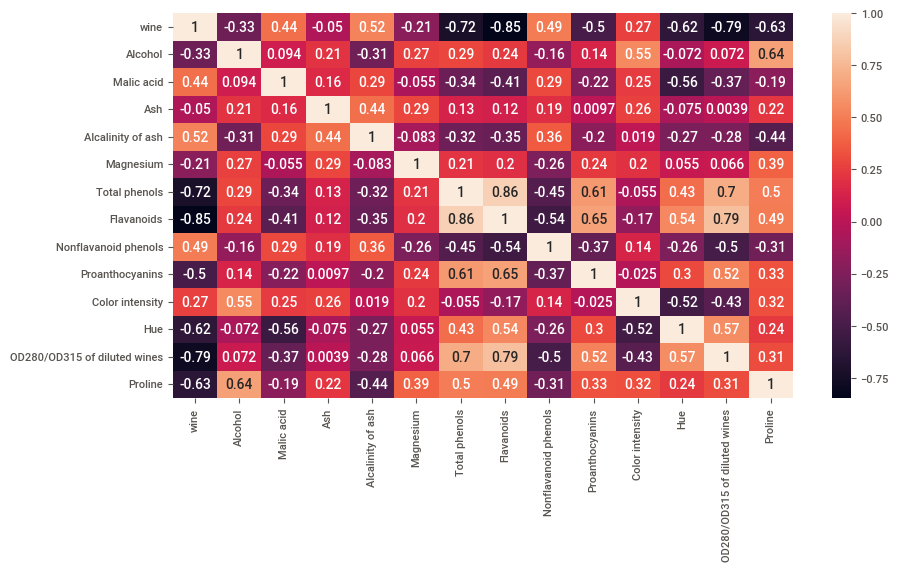

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [27]:
#There is no co-relation in this data set (max co-relation point is 0.86)

# Train Test Split

In [28]:
x= df.iloc[:,1:]

In [29]:
y=df.wine

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
xtrain, xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((142, 13), (36, 13), (142,), (36,))

# Model Creation

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel=LogisticRegression()
logmodel.fit(xtrain,ytrain)
pred=logmodel.predict(xtest)

In [35]:
ypred=logmodel.predict(xtest)
ypred

array([1, 1, 3, 1, 2, 1, 2, 3, 1, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       3, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1], dtype=int64)

# Model Evalution

In [36]:
#logesticRegression:

In [37]:
from sklearn.metrics import classification_report

In [38]:
pd.crosstab(ytest,ypred)

col_0   1   2  3
wine            
1      14   0  0
2       1  12  1
3       0   0  8

In [39]:
print (classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.86      0.92        14
           3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



# SVM

In [40]:
from sklearn.svm import SVC

In [41]:
svcmodel=SVC()
svcmodel.fit(xtrain,ytrain)

SVC()

In [42]:
ypred=svcmodel.predict(xtest)

In [43]:
print (classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.69      0.79      0.73        14
           3       0.50      0.38      0.43         8

    accuracy                           0.78        36
   macro avg       0.73      0.72      0.72        36
weighted avg       0.77      0.78      0.77        36



# DecisionTree classifier

In [44]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
xtrain_sm,ytrain_sm=smote.fit_resample(xtrain,ytrain)

In [45]:
from collections import Counter
print("before SMOTE:",Counter(ytrain))
print("After SMOTE:",Counter(ytrain_sm))

before SMOTE: Counter({2: 57, 1: 45, 3: 40})
After SMOTE: Counter({3: 57, 2: 57, 1: 57})


In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=10)
dt.fit(xtrain_sm,ytrain_sm)

DecisionTreeClassifier(random_state=10)

In [47]:
ypred=dt.predict(xtest)

In [48]:
print (classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.88      1.00      0.93        14
           3       1.00      0.62      0.77         8

    accuracy                           0.92        36
   macro avg       0.94      0.88      0.89        36
weighted avg       0.93      0.92      0.91        36



In [49]:
from sklearn.model_selection import GridSearchCV
params = {"criterion":("gini","entropy"),
          "splitter":("best", "random"),
          "max_depth":(list(range(1,20))),
          "min_samples_split":[2,3,4],
          "min_samples_leaf":list(range(1,20))}

In [50]:
tree_clf = DecisionTreeClassifier(random_state=10)
tree_cv = GridSearchCV(tree_clf,params,scoring="f1_weighted",n_jobs= -1,verbose=2,cv=3)

In [51]:
tree_cv.fit(x,y)
tree_cv.best_params_

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'splitter': 'best'}

In [52]:
df = DecisionTreeClassifier(criterion="gini",
                            max_depth=3,min_samples_leaf=6,min_samples_split=2,
                            splitter='best',random_state=10)
df.fit(xtrain_sm,ytrain_sm)
ypred=dt.predict(xtest)
print(classification_report(ytest,ypred))
pd.crosstab(ytest,ypred)

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.88      1.00      0.93        14
           3       1.00      0.62      0.77         8

    accuracy                           0.92        36
   macro avg       0.94      0.88      0.89        36
weighted avg       0.93      0.92      0.91        36



col_0   1   2  3
wine            
1      14   0  0
2       0  14  0
3       1   2  5

# RandomForest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf=RandomForestClassifier(n_estimators=10,random_state=1) 
rf.fit(xtrain,ytrain)
pred=rf.predict(xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.93      1.00      0.97        14
           3       1.00      0.88      0.93         8

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



In [55]:
#Random Forest - Hyperparameter tuning
params = {
          "n_estimators":[5,10,20,40,80,120,200,400,750,1000],
          "criterion":("gini","entropy"),
          "max_depth":(list(range(2,20))),
          "min_samples_split":[2,3,4,5,6,7,8,9],
          "min_samples_leaf":[2,3,4,5,6,7,8,9],
          "max_features":["sqrt","log2"],
          "bootstrap":[True,False]
}

In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
rf1= RandomForestClassifier(random_state=1,n_jobs=-1)
randomcv=RandomizedSearchCV(estimator=rf1,param_distributions=params,
                          cv=3, refit=True,verbose=2,scoring="f1_weighted",
                           n_iter=200,random_state=10,n_jobs=-1)

In [58]:
randomcv.fit(x, y)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ('gini', 'entropy'),
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [5, 10, 20, 40, 80, 120,
                                                         200, 400, 750, 1000]},
                   random_state=10, scoring='f1_weighted', verbose=2)

In [59]:
randomcv.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 3,
 'criterion': 'entropy',
 'bootstrap': True}

In [60]:
rf2=RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                         min_samples_leaf=2,max_features='sqrt',
                         max_depth=13,criterion='entropy',
                         bootstrap=False,random_state=1) 
rf2.fit(xtrain,ytrain)
pred=rf2.predict(xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



# GradientBoosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
pred=gb.predict(xtest)

In [62]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.93      0.93      0.93        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



In [63]:
pd.crosstab(ytest,pred)

col_0   1   2  3
wine            
1      14   0  0
2       1  13  0
3       0   1  7

In [64]:
# I have got highest accuracy in RandomForest classifier (1.00)